# Lecture 1: *Review of Univariate Optimization*

# Part I: Preliminaries and Definitions
We let $\mathbb{R}$ denote the set of real numbers. Suppose $f:\mathbb{R}\rightarrow\mathbb{R}$ is a real-valued function. An **optimization program** involves a search for the largest (or, smallest) value $f$ attains, as well as any possible points $x$ for which $f(x)$ is exactly this largest (or, smallest) value. Such an $f$ is often called an **objective function** or just an **objective**.

To begin with, a **minimization program** over $\mathbb{R}$ is written
$$
(P_\min):\:\:\min_{x\in\mathbb{R}}\: f(x)
$$
where $f:\mathbb{R}\rightarrow\mathbb{R}$ is a real-valued function. A point $x^\ast\in\mathbb{R}$ is said to be a **solution** to (or, **minimizer**/**minimum** of) $(P_\min)$ if $f(x^\ast)\leq f(x)$ for all $x\in\mathbb{R}$. 

A **maximization program** over $\mathbb{R}$ is written
$$
(P_\max):\:\:\max_{x\in\mathbb{R}}\: f(x).
$$
A point $x^\ast\in\mathbb{R}$ is said to be a **solution** to (or, **maximizer**/**maximum** of) $(P_\max)$ if $f(x)\leq f(x^\ast)$ for all $x\in\mathbb{R}$.

Two optimization programs are said to be **equivalent** if a solution for one is always a solution for the other as well.

## The Reflection Principle

If $x^\ast$ is a solution to $(P_\max)$, then $x^\ast$ is a solution to 
$$
\min_{x\in\mathbb{R}}\: -f(x).
$$
Similarly, if $z_\ast$ is a solution $(P_\min)$, then $z_\ast$ is a solution to
$$
\max_{x\in\mathbb{R}}\: -f(x).
$$

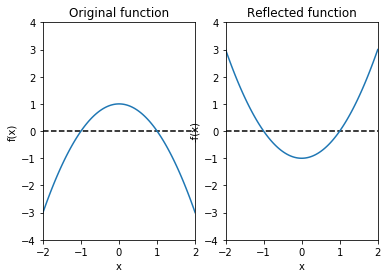

In [3]:
'''
Example 01: The reflection principle
'''

# Import numerical python and pyplot
import numpy as np # Namespace is np
import matplotlib.pyplot as plt # Namespace is plt

def f(x):
    '''
    A simple quadratic polynomial
    :param x: a numerical value or numpy array
    :return: 1-x^2
    '''
    return 1 - x**2

x = np.linspace(-2, 2, 100) # a uniform partition of [0, 1] consisting of 100 points
g = lambda z: -f(z) # anonymous function composing f with negation

plt.figure('The reflection principle')

plt.subplot(1, 2, 1)
plt.plot([-2, 2], [0, 0], 'k--') # The dashed line is y=0
plt.plot(x, f(x)) # f(x) works because of "vectorization"
plt.axis([-2, 2, -4, 4])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Original function')

plt.subplot(1, 2, 2)
plt.plot([-2, 2], [0, 0], 'k--') # The dashed line is y=0
plt.plot(x, g(x))
plt.axis([-2, 2, -4, 4])
plt.xlabel('x')
plt.ylabel('-f(x)')
plt.title('Reflected function')

plt.show()

It follows from the reflection principle that any maximization program is equivalent to the minimization program involving the negated function. Thus, we need only consider minimization programs when we talk about optimization.

A **minimum value** of $f:\mathbb{R}\rightarrow\mathbb{R}$ is a value $p\in\mathbb{R}$ such that $p\leq f(x)$ and if $y\leq f(x)$ for all $x\in\mathbb{R}$, then $y\leq p$. Similarly, a **maximum value** of $f$ is a value $q$ satisfying $f(x)\leq q$ for all $x\in\mathbb{R}$ and if $f(x)\leq y$ for all $x\in\mathbb{R}$, then $q\leq y$.

## Constrained Optimization
The above optimization programs over all of $\mathbb{R}$ are often called **unconstrained** optimization programs. If instead we are only interested in optimizing over a subset $X\subset\mathbb{R}$, we write the **constrained** optimization program as
$$
(P):\:\:\min f(x)\text{ subject to }x\in X
$$
In this case, a **minimum value** is any $p$ satisfying $p\leq f(x)$ for all $x\in X$, and if $r\leq f(x)$ for all $x\in\mathbb{R}$, then $r\leq p$. A **solution**/**minimizer**/**minimum** is any $x^{(0)}\in X$ such that $f(x^{(0)})\leq f(x)$ for all $x\in X$.

Any point $x\in X$ is called a **feasible point** or just **feasible**, and the set $X$ is often called the **feasible region**, **region of optimization**, or **set of feasible points**. If $x\not\in X$, then $x$ is **not feasible**. If $X$ contains no points (i.e. $X$ is the empty set, or $X=\emptyset$), then the program $(P)$ is called **infeasible**.

## Team Problems
1. Write down a function which does not have a minimum value.
2. Write down a function which has a minimum value, but which does not have a minimzer.
3. Can a function ever have a minimizer, but fail to have a minimum value?
4. Suppose $x^\ast$ solves $\min_{x\in\mathbb{R}} -f(x)$. What is the maximum value of $f$ over $\mathbb{R}$?
5. Explain why the minimum value of $f$ is unique if it exists; that is, if $p$ and $q$ are both minimum values of $f$, show that $p=q$. Answer: Since $p$ is a minimum value, then $p\leq q$. Also, $q\leq p$ since $q$ is minimum. By trichotomy, $p=q$.
6. Explain why $\min x^2$ subject to $x^2+2x+2\leq 0$ is an infeasible program.
7. Suppose $f, g:\mathbb{R}\rightarrow\mathbb{R}$ and $p>-\infty$ is the minimum value of $g$. Is $p$ the minimum value of $h=g\circ f$ (i.e. $h(x)=g(f(x))$? 
8. A function $f:\mathbb{R}\rightarrow\mathbb{R}$ is **monotone decreasing** if $f(x)>f(y)$ for all $x<y$. If $f$ is monotone decreasing, show that it cannot have a minimizer. Answer: Suppose $x^\ast$ is a minimizer. Then $f(x^\ast+1)<f(x^\ast)$ since $x^\ast < x^\ast + 1$, so we have contradicted the fact that $x^\ast$ is a solution.

# Part II: Important considerations
When approaching any optimization program, there are some basic questions that need to be answered.

1. Does $(P_\min)$ have a minimum value?
2. Does $(P_\min)$ have a solution?
3. Does $(P_\min)$ have a **unique** solution?
4. When $(P_\min)$ has a minimum value, how can we find an $\widetilde{x}$ such that $f(\widetilde{x})$ is close to the minimum value?
5. When $(P_\min)$ has a solution $x^\ast$, how can we find an $\widetilde{x}$ which is close to $x^\ast$?

Without imposing additional structure on $f$, the answers to these questions are generally "no." In each of the following sections, we explore conditions on $f$ which allow us to know when the answers to the above questions are "yes."

# Part III: Existence of minimum values and minimizers

If there is an $L\in\mathbb{R}$ such that $L\leq f(x)$ for all $x\in\mathbb{R}$, then $f$ is said to be **bounded below**.

### Theorem: If $f$ is bounded below, then $(P_\min)$ has a minimum value.

A function $f:\mathbb{R}\rightarrow\mathbb{R}$ is **continuous** if $f(x)=\lim_{n\rightarrow\infty} f(x_n)$ whenever $x=\lim_{n\rightarrow\infty} x_n$, and where $\{x_n\}_{n=1}^\infty$ is a real sequence.

Given a set $X\subset\mathbb{R}$, a function $f:X\rightarrow\mathbb{R}$ is **continuous on $X$** if $f(x)=\lim_{n\rightarrow\infty} f(x_n)$ whenever $\lim_{n\rightarrow\infty} x_n=x$, where $\{x_n\}_{n=1}^\infty\subset X$ and $x\in X$. That is, $\{x_n\}_{n=1}^\infty$ is a sequence in $X$ that converges to a point in $X$.

A set $X\subset\mathbb{R}$ is said to be **closed** if whenever $\{x_n\}_{n=1}^\infty\subset X$ (that is, $\{x_n\}_{n=1}^\infty$ is a sequence in $X$), and $x=\lim_{n\rightarrow\infty}x_n$, then $x\in X$. That is, $X$ is closed with respect to convergent limits.

A set $X\subset\mathbb{R}$ is said to be **bounded** if there is an $R>0$ with $X\subset (-R, R)$. $X$ is said to be **compact** if $X$ is closed and bounded.

In 1D, the simplest class of examples of compact sets are intervals of the form $[a, b]$, where $a,b\in \mathbb{R}$ and $a\leq b$.


### Theorem (Extreme Value Theorem): If $X$ is compact and $f:X\rightarrow\mathbb{R}$ is continuous on $X$, then $f$ has a minimizer $x^\ast\in X$.


# Part IV: Uniqueness of Solutions and Convexity
Uniqueness of solutions is generally contingent upon convexity of the optimization program. 

A set $X\subset\mathbb{R}$ is said to be **convex** if for any $a, b\in X$ and any $t\in[0,1]$, $(1-t)a + tb\in X$. It turns out that all convex subsets of $\mathbb{R}$ are of the form $(a, b)$, $(a, b]$, $[a, b)$, or $[a, b]$ where $a$ can be $-\infty$ and $b$ can be $\infty$.

If $X$ is a convex set:

1. $f:X\rightarrow\mathbb{R}$ is said to be **convex** on $X$ if for every $a, b\in X$ and every $t\in[0,1]$ we have that
$$
f((1-t)a + tb) \leq (1-t)f(a) + t f(b).
$$ 
2. $f:X\rightarrow\mathbb{R}$ is said to be **strictly convex** on $X$ if for every $a\not= b\in X$ and every $t\in(0,1)$ we have that
$$
f((1-t)a + tb) < (1-t)f(a) + t f(b).
$$ 
3. $f:X\rightarrow\mathbb{R}$ is said to be **strongly convex** on $X$ if it is twice differentiable on $\mathbb{R}$ and there is a $c>0$ such that $f^{\prime\prime}(x)>c$ for all $x\in X$.

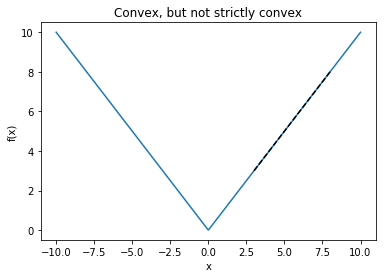

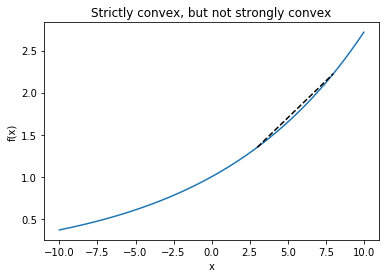

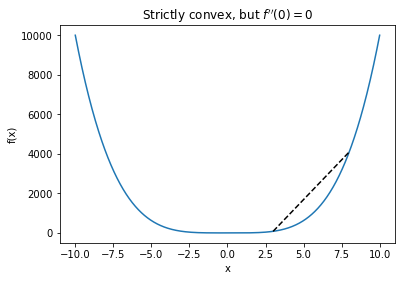

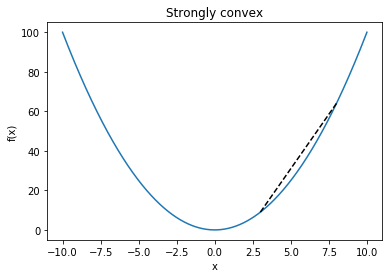

In [4]:
'''
Convexity Examples
'''

t = np.linspace(0, 1, 100)
x = np.linspace(-10, 10, 1000)
a = 3
b = 8
l = (1-t)*a + t*b

plt.plot(x, np.abs(x))
plt.plot(l, (1-t)*np.abs(a) + t*np.abs(b), 'k--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Convex, but not strictly convex')
plt.show()

plt.plot(x, np.exp(x/10))
plt.plot(l, (1-t)*np.exp(a/10) + t*np.exp(b/10), 'k--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Strictly convex, but not strongly convex')
plt.show()

plt.plot(x, x**4)
plt.plot(l, (1-t)*a**4 + t*b**4, 'k--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Strictly convex, but $f^{\prime\prime}(0)=0$')
plt.show()

plt.plot(x, x**2)
plt.plot(l, (1-t)*a**2 + t*b**2, 'k--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Strongly convex')
plt.show()

It is not too difficult to establish that strong convexity implies strict convexity implies convexity. With additional work, convexity can be shown to imply continuity (except possibly at endpoints).

#### Theorem (Convex Functions are Continuous): If $X$ is convex and open, and $f:X\rightarrow\mathbb{R}$ is convex on $X$, then $f$ is continuous on $X$.

If $f$ is convex, then $(P_\min)$ is called a **convex program**. 

Now, **strict minimizer**/**unique minimizer** of $f$ on $X$ is a point $x^\ast$ such that $f(x^\ast)<f(x)$ for all $x\in X\setminus\{x^\ast\}$. We say that $f\in C^2(X)$ if $f\in C^1(X)$ and $f^\prime\in C^1(X)$.

#### Theorem (Fundamental Theorem of Convex Programming): If $X\subset\mathbb{R}$ is convex, compact, and $f:X\rightarrow\mathbb{R}$ is  convex on $X$, then the set of minimizers of $f$ on $X$ form a convex set. Moreover, if $f$ strictly convex on $X$, then $f$ has a unique minimizer on $X$.

This is a very strong theoretical guarantee, but we need some tools for verifying convexity. Let $C^1(X)$ denote the set of all functions $f:X\rightarrow\mathbb{R}$ such that $f^\prime(x)$ exists for all $x\in X$, and $f^\prime(x)$ is continuous on $X$. 

#### Theorem (First Order Conditions for Convexity): If $X\subset\mathbb{R}$ is convex, then $f\in C^1(X)$ is convex if and only if $f(x)\geq f(y) + f^\prime(y)(x-y)$ for all $x,y\in X$. If $f(x) > f(y) + f^\prime(y)(x-y)$ for all $x,y\in X$, then $f$ is strictly convex.

The first order conditions are not always easy to verify, so we would also like second order conditions to make our lives easier. 

#### Theorem (Second Order Conditions for Convexity):  If $X\subset\mathbb{R}$ is convex, then $f\in C^2(X)$ is convex if and only if $f^{\prime\prime}(x)\geq 0$ for all $x\in X$. If $f^{\prime\prime}(x)>0$ for all $x\in X$, then $f$ is strictly convex.

These conditions are quite useful in practice, but there are also several operations that preserve convexity.

#### Theorem (Positive Weighted Sum of Convex is Convex): If $X\subset\mathbb{R}$ is convex, $f,g:X\rightarrow\mathbb{R}$ are convex on $X$, and $a, b\geq 0$, then $h:X\rightarrow\mathbb{R}$ defined by $h(x) = af(x) + bg(x)$ for all $x\in X$ is convex on $X$.

#### Theorem (Pointwise Maximum of Convex is Convex): If $X\subset\mathbb{R}$ is convex and $f, g:X\rightarrow\mathbb{R}$ are convex on $X$, then $h:X\rightarrow\mathbb{R}$ defined by $h(x) = \max(f(x), g(x))$ for all $x$ is also convex on $X$.


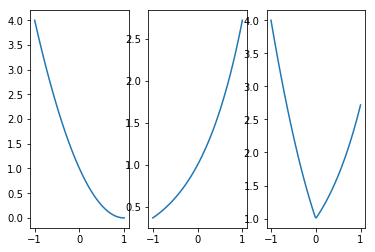

In [5]:
# Example: pointwise maximum of two functions

t = np.linspace(-1, 1, 100)
f = lambda x: (x-1)**2
g = lambda x: np.exp(x)
h = lambda x: max(f(x), g(x)) # The pointwise maximum of f and g

h_vals = np.zeros(100)
for i in range(100):
    h_vals[i] = h(t[i]) 
    
plt.figure('Pointwise Max Example')
plt.subplot(1, 3, 1)
plt.plot(t, f(t))
plt.subplot(1, 3, 2)
plt.plot(t, g(t))
plt.subplot(1, 3, 3)
plt.plot(t, h_vals)
plt.show()





A function $f:\mathbb{R}\rightarrow\mathbb{R}$ is called **affine** if there are $a, b\in\mathbb{R}$ such that $f(x)=ax+b$ for all $x\in\mathbb{R}$.

#### Theorem (Convexity Preservation under Affine Precomposition): Suppose $X\subset\mathbb{R}$ is convex, $f:X\rightarrow\mathbb{R}$ is convex on $X$, $a,b\in\mathbb{R}$, and set $Y = \{y\in\mathbb{R}: ay+b\in X\}$. Then $Y$ is convex and $g:Y\rightarrow\mathbb{R}$ defined by $g(y) = f(ay+b)$ for all $y\in Y$ is convex on $Y$.

For this next theorem, we define the **image** of a function $f:X\rightarrow\mathbb{R}$ as the set 
$$
f(X)=\{y\in\mathbb{R}: f(x)=y\text{ for some }x\in X\}.
$$
Note that if $X$ is convex and $f$ is convex over $X$, then $f(X)$ is also convex: if $p, q\in f(X)$, there are $v, w\in X$ with $f(v)=p, f(w)=q$. Let $t\in[0,1]$ and set $r=(1-t)p + tq$. Since $r$ is between $p$ and $q$, there is $z$ between $v$ and $w$ such that $f(z)=r$ by the Intermediate Value Theorem, and hence $(1-t)p+tq\in f(X)$ for all $t\in[0,1]$.

We also say that a function $f:X\rightarrow\mathbb{R}$ is **non-decreasing** or **order preserving** on $X$ if $x\leq y$ implies $f(x)\leq f(y)$ for all $x, y\in X$.

#### Theorem (Convexity Preservation under Convex Monotone Transformation): Suppose $X\subset\mathbb{R}$ is convex, $f:X\rightarrow\mathbb{R}$ is convex on $X$, and that $g:f(X)\rightarrow \mathbb{R}$ is convex and non-decreasing, then $g\circ f: X\rightarrow\mathbb{R}$ is convex on $X$.

## Team Questions

1. Show that $f(x)=x\arctan(x) - \frac{1}{2}\log(1+x^2)$ is strictly convex on $\mathbb{R}$. 
2. Show that $f(x)=-\log(-x)$ is strictly convex and order preserving on $(-\infty,0)$. 
3. If $X$ is convex and $f_1, f_2, \ldots, f_k:X\rightarrow\mathbb{R}$ are all convex, explain why $g:X\rightarrow\mathbb{R}$ defined by $g(x)=\sum_{i=1}^k f_i(x)$ is also convex.  
4. If $X$ is convex and $f_1, f_2, \ldots, f_k:X\rightarrow\mathbb{R}$ are all convex, explain why $g:X\rightarrow\mathbb{R}$ defined by $g(x)=\max_{i=1,\ldots, k} f_i(x)$ is also convex. 
5. For $x_1,x_2,\ldots,x_N\in\mathbb{R}$, show that
$$
\max_{x\in\mathbb{R}}\prod_{i=1}^N e^{-\frac{1}{2}(x-x_i)^2}
$$
is equivalent to a convex optimization program.
6. A function is **concave** on $\mathbb{R}$ if $f((1-t)x+ty)\geq (1-t)f(x)+tf(y)$ for all $x,y\in\mathbb{R}$ and all $t\in[0,1]$. Explain why $f$ is concave if and only if $-f$ is convex. 
7. What is the geometric interpretation of the first order condition $f(x)\geq f(y)+f^\prime(y)(y-x)$? 
8. The **epigraph** of a function $f:\mathbb{R}\rightarrow\mathbb{R}$ is the set defined by $\text{epi}(f) = \{(x,y)\in\mathbb{R}\times\mathbb{R}: f(x)\leq y\}$. Show that $f$ is convex if and only if $((1-\alpha)x_0+\alpha x_1, (1-\alpha)y_0+\alpha y_1)$ for all $(x_0, y_0), (x_1, y_1)\in\text{epi}(f)$ and all $\alpha\in[0,1]$ (in other words, $\text{epi}(f)$ is a convex 2D set and contains all line segments connecting points inside of it). 

# Part V: Algorithms for Minimization


## Brute force search
Theoretically, one could simply employ **brute force search** to minimize a function $f$ by evaluating $f(x)$ for each point in the feasible region. However, our feasible regions have infinitely many points to consider, so this approach is impractical.

Recall that a function $f:X\rightarrow \mathbb{R}$ is **differentiable** at $x^{(0)}\in X$ if the limit
$$
f^\prime(x^{(0)})=\lim_{A\ni x\rightarrow x^{(0)}} \frac{f(x)-f(x^{(0)})}{x-x^{(0)}}
$$
exists. If $f$ is differentiable at $x$ for all $x$ in $X$, then we say that $f$ is **differentiable on** $X$. If $f$ is differentiable on $X$ and the derivative function $f^\prime$ is continuous on $X$, we say that $f$ is **continuously differentiable** and write $f\in C^1(X)$. Similarly, if $f^\prime\in C^1(X)$, we say that $f\in C^2(X)$, and if $f^\prime\in C^2(X)$ then $f\in C^3(X)$.

The **interior** of a set $X\subset\mathbb{R}$, denoted $\text{int}(X)$ is the largest open subset of $\mathbb{R}$ in $X$. In particular, $x\in \text{int}(X)$ if and only if there is an $\varepsilon>0$ such that $(x-\varepsilon, x+\varepsilon)\subset X$.

### Theorem (Necessary Conditions for Optimality): If $f:X\rightarrow\mathbb{R}$ is differentiable on $X$ and $x^\ast\in\text{int}(X)$ is a minimizer of $f$, then $f^\prime(x^\ast)=0$.

The necessary conditions for optimality are most useful when

1. enough is known about $f$ to analytically find all solutions to $f^\prime(x)=0$, and
2. the solution set of $f^\prime(x)=0$ is either small or easy to characterize.


p attains the minimum value -80.000000 at 6.000000 on [0, 6]


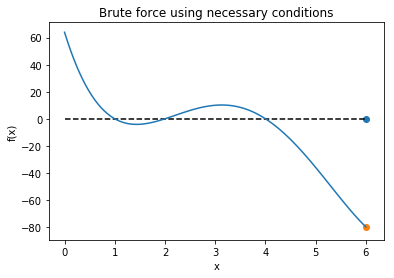

In [6]:
'''
Example 02: f(x)=(x-1)(x-2)(x-4)(x-8) = x^4 -15x^3  on [0, 6]
'''

def poly_deriv_coeffs(a):
    '''
    Computes the coefficients of the derivative of a poly from the coeffs of a poly
    :param a: coefficients of a poly in decreasing order of associated degree
    :return: coeffs of deriv in decreasing order of the degree
    '''
    b=[]
    for i in range(len(a)-1):
        b.append((len(a)-1-i)*a[i])
    return b

p = lambda x: (x-1) * (x-2) * (x-4) * (x-8)

coeffs = np.poly([1, 2, 4, 8])
dcoeffs = poly_deriv_coeffs(coeffs)
roots = np.roots(dcoeffs) # numpy computes the zeros of the poly's derivative from the coeffs of the deriv

feasible_solutions = roots[roots <= 6] # remove all roots above 6
feasible_solutions = feasible_solutions[0 <= feasible_solutions] # remove all roots below 0
feasible_solutions = np.append(feasible_solutions, [0, 6]) # add endpoints to check

feas_vals = [p(t) for t in feasible_solutions]
k = np.argmin(feas_vals)

x_ast = feasible_solutions[k]
p_min = feas_vals[k]

print('p attains the minimum value %f at %f on [0, 6]' % (p_min, x_ast))

s = np.linspace(0, 6, 100)
p_graph = p(s)

plt.plot([0, 6], [0, 0], 'k--')
plt.plot(s, p_graph)
plt.scatter([x_ast], [0])
plt.scatter([x_ast], [p_min])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Brute force using necessary conditions')
plt.show()




Recall that the points for which $f^\prime(x)=0$ are called **critical points**. There are several important types of critical points.

1. $x$ is a **local minimizer** of $f:X\rightarrow\mathbb{R}$ if there is an $\varepsilon>0$ such that $f(x)\leq f(y)$ for all $y\in(x-\varepsilon, x+\varepsilon)\cap X$ (the **intersection** of the $\varepsilon$-neighborhood around $x$ and $X$).
2. $x$ is a **local maximizer** of $f:X\rightarrow\mathbb{R}$ if there is an $\varepsilon>0$ such that $f(x)\geq f(y)$ for all $y\in(x-\varepsilon, x+\varepsilon)\cap X$
3. $x$ is a **global minimizer** of $f:X\rightarrow\mathbb{R}$ if $f(x)\leq f(y)$ for all $y\in X$. 
4. $x$ is a **global maximizer** of $f:X\rightarrow\mathbb{R}$ if $f(x)\geq f(y)$ for all $y\in X$. 

Note that a global minimizer in the interior of a set must also be a local minimizer. Thus, the second derivative test allows us to exclude all local maximizers from our search.

### Theorem (Second Derivative Test): Let $f\in C^2(X)$. If $x^\ast\in \text{int}(X)$ is a global minimizer, then $f^{\prime\prime}(x^\ast)\geq0$.

With a one more conditiodn on $f$, the necessary conditions also become sufficient conditions.

### Theorem (Sufficient Conditions for Optimality): If $X\subset\mathbb{R}$ is a convex set, $f:X\rightarrow\mathbb{R}$ is convex and differentiable on $X$, and $x^\ast\in X$ satisfies $f^\prime(x^\ast)=0$, then $x^\ast$ is a minimizer of $f$ on $X$.

This gives us nice theoretical tools, and illustrates why convexity is so useful. On the other hand, solving $f^\prime(x)=0$ may be exceedingly difficult, making brute force search on the critical points (and end points!) untenable for many applications.

## Team Questions

1. Find the minimizer of the function $f(x)=x^3-3x+1$ on the interval $[0, 2]$.
2. Find the minimizer of the function $f(x)=\frac{1}{x}e^x$ on the interval $(0,\infty)$.
3. Find the minimizer of the function $f(x)=\log(1+e^{-x})+\log(1+e^{x})$
4. Find the minimizer of the function $f(x)=\vert x-1\vert + \vert x-2\vert + \vert x-4\vert$
5. Find the minimizer of the function $f(x)=(x-1)^2+(x-2)^2+(x-4)^2$
6. Find the minimizer of the function $f(x)=\max(\vert x-1\vert, \vert x-2\vert, \vert x-4\vert)$
7. Find the minimizer of the function $f(x)=x^4-4x+1$ on $[-3, -2]\cup[3, 4]$
8. Which of the above programs are convex?

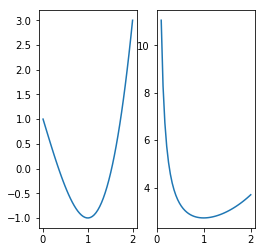

In [7]:
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0, 2)
f1 = lambda x: x**3 - 3*x +1

t2 = np.linspace(0.1, 2)
f2 = lambda x: np.exp(x)/x

plt.figure('Graphs')

plt.subplot(1, 3, 1)
plt.plot(t1, f1(t1))

plt.subplot(1, 3, 2)
plt.plot(t2, f2(t2))



plt.show()





## Backtracking

For problems that do not yield to brute force, we can often implement **iterative** methods that produce a sequence of points with smaller and smaller function values. Such methods generally only rely on local information (i.e. evaluations of the function and its derivative). We now construct a practical algorithm with the following properties:

1. The algorithm can be used for any $f$ which is differentiable on $\mathbb{R}$.
2. The algorithm can be initialized with any point $x^{(0)}\in\mathbb{R}$ and produces a sequence of **iterates** $x^{(1)}, x^{(2)}, x^{(3)},\ldots$ where the $(k+1)$th iterate $x^{(k+1)}$ only depends on $x^{(k)}$, $f(x^{(k)})$, $f^\prime(x^{(k)})$, and two user-defined parameters $\alpha, \beta\in (0,1)$
3. The sequence of iterates satisfies $f(x^{(0)}) > f(x^{(1)}) > f(x^{(2)}) >\cdots$

To motivate the algorithm, assume that $f$ is differentiable on $\mathbb{R}$, let $\alpha, \beta \in (0, 1)$, $x\in\mathbb{R}$ with $f^\prime(x)\not=0$, and suppose that $\Delta x$ has the opposite sign as $f^\prime(x)$. If $f^\prime(x)$ is positive, then note that $\lim_{n\rightarrow\infty}\beta^n=0$ and hence
$$
\lim_{n\rightarrow\infty} \frac{f(x + \beta^n \Delta x) - f(x)}{\beta^n\Delta x}=f^\prime(x) > \alpha f^\prime(x).
$$
Consequently, there is an $N$ such that $n\geq N$ implies
$$
\frac{f(x + \beta^n \Delta x) - f(x)}{\beta^n\Delta x} > \alpha f^\prime(x).
$$
On the other hand, if $f^\prime(x)<0$, then there is an $N$ such that $n\geq N$ such that 
$$
\frac{f(x + \beta^n \Delta x) - f(x)}{\beta^n\Delta x} < \alpha f^\prime(x).
$$
In either case, it follows that there is an $n$ such that
$$
f(x + \beta^n \Delta x) - f(x) < \alpha \beta^n\Delta x f^\prime(x),
$$
and hence
$$
f(x + \beta^n\Delta x) < f(x) +\alpha\beta^n\Delta x f^\prime(x) < f(x).
$$
Thus, we simply need increase $n$ until this condition is satisfied to decrease the function.

#### Theorem (Monotonicity of Backtracking): Suppose $f$ is differentiable on $\mathbb{R}$ and $x^{(0)}\in\mathbb{R}$. Define the sequence $x^{(0)}, x^{(1)}, x^{(2)}, x^{(3)}, \ldots$ by successively setting $x^{(k+1)}=x^{(k)} + \beta^n\Delta x^{(k)}$ where $n$ is the first $n\geq 0$ such that $f(x^{(k)} + \beta^n\Delta x^{(k)})\leq f(x^{(k)}) + \alpha\beta^n \Delta x^{(k)} f^\prime(x^{(k)})$, and where the increments $\Delta x^{(1)}, \Delta x^{(2)}, \Delta x^{(3)},\ldots$ which have the opposite signs as $f^\prime(x^{(0)}),  f^\prime(x^{(1)}), f^\prime(x^{(2)}),\ldots$. Then $f(x^{(0)}) > f(x^{(1)}) > f(x^{(2)}) > f(x^{(3)}) > \cdots$. 

Our previous analysis gives us this nice theoretical guarantee, but it also offers quantitative estimates for the decrease from each $f(x^{(k)})$ to $f(x^{(k+1)})$. 

One immediate question presents itself: how do we choose $\Delta x^{(k)}$, $\alpha$, and $\beta$? Generally we let $\Delta x^{(k)}=-f^\prime(x^{(k)})$, which is called **steepest descent**. The choices of $\alpha$ and $\beta$ are best explained by example.

We now provide code for the backtracking algorithm, and we illustrate how it behaves in a simple scenario.


In backtracking...
9
9


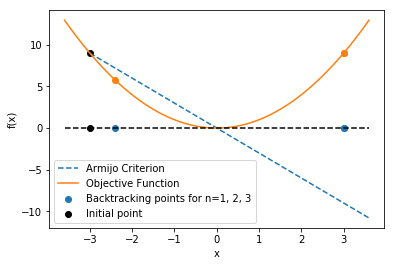

In backtracking...
5.76
5.76


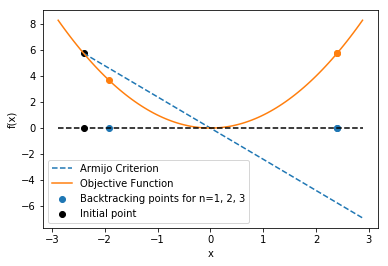

In backtracking...
3.6864
3.6864


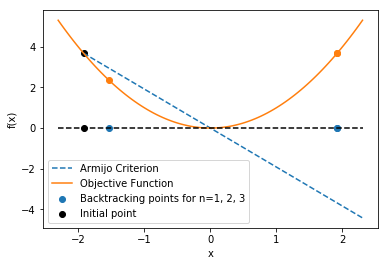

In [4]:
# Import numerical python and pyplot
import numpy as np # Namespace is np
import matplotlib.pyplot as plt # Namespace is plt


def backtracking1D(x0, dx, f, df0, alpha=0.2, beta=0.8, verbose=False):
    '''
    Backtracking for 1D functions with illustrations
    :param x0: Previous point from backtracking $x^{(k)}$, or initial guess $x^{(0)}$
    :param dx: Incremental factor for updating x0; $\Delta x$
    :param f: Objective function
    :param df0: Derivative of f at x0 or $f^\prime(x^{(0)})$
    :param alpha: Sloping factor of stopping criterion
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots to illustrate
    :return: x1, the next iterate in backtracking, or $x^{(k+1)}$
    '''
    
    print('In backtracking...')
    
    if verbose:
        n=0
        xs = [x0 + dx] * 3
    
    ######################################
    # The core of the algorithm
    ######################################
    delta = alpha * dx * df0 # Just precomputing the alpha times increment times derivative factor
    t = 1 # Initialize t=beta**0; beta**n in the loop
    f0 = f(x0) # Evaluate for future use
    x = x0 + dx # Initialize x_{0, inner}, $x = x^{(0)}+\beta^0\Delta x$
    fx = f(x)
    print(fx)
    while (not np.isfinite(fx)) or fx > f0 + delta * t:
        print(fx)
        t = beta * t
        x = x0 + t * dx
        fx = f(x)
    ###################################### 
    
        if verbose:
            n += 1
            xs.append(x)
            xs.pop(0)
            
    if verbose: 
        u = 1.1 * np.abs(xs[0] - x0)
        l = 0.1 * np.abs(xs[0] - x0)
        if dx < 0:
            s = np.linspace(x0 - u, x0 + l, 100)
            xi = [x0-u, x0]
            fxi = [f(x0) - alpha*u*df0, f(x0)]
        else:
            s = np.linspace(x0 - l, x0 + u, 100)
            xi = [x0, x0 + u]
            fxi = [f(x0), f(x0) + alpha*u*df0]
            
        y = np.zeros(len(s))
        for i in range(len(s)):
            y[i] = f(s[i]) # Slow for vectorized functions
            
        plt.figure('Backtracking illustration')
        arm, =plt.plot(xi, fxi, '--', label='Armijo Criterion')
        fcn, =plt.plot(s, y, label='Objective Function')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        pts =plt.scatter(xs, [0 for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(xs, [f(p) for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([x0, x0], [0, f(x0)], color='black', label='Initial point')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.show()
    
    return x

# We illustrate a few backtracking steps for  simple quadratic

fun = lambda x: x**2
dfun = lambda x: 2*x

x0 = -3 # $x^{(0)}$
dx = -dfun(x0) # $\Delta x^{(0)} = -f^\prime(x^{(0)})$

alpha = 0.5
beta = 0.1

# First backtracking step
#x1 = backtracking1D(x0, dx, fun, dfun(x0), alpha=alpha, beta=beta, verbose=True) # get $x^{(1)}$ from $x^{(0)}$

x1 = backtracking1D(x0, -dfun(x0), fun, dfun(x0), alpha=alpha, beta=beta, verbose=True) # get $x^{(1)}$ from $x^{(0)}$

# Second backtracking step
x2 = backtracking1D(x1, -dfun(x1), fun, dfun(x1), alpha=alpha, beta=beta, verbose=True) # get $x^{(2)}$ from $x^{(1)}$

# Third backtracking step
x3 = backtracking1D(x2, -dfun(x2), fun, dfun(x2), alpha=alpha, beta=beta, verbose=True)


In this example, we see that the backtracking iterates $x^{(k)}$ rapidly tend towards $0$, and the **iterate values** $f(x^{(k)})$ also tend toward $f(0)=0$ very quickly. The speed of this convergence is often called the **convergence rate**. Now that we have an example algorithm, we can ask the following questions:

1. Is there an algorithm which has a better convergence rate?
2. Is there an algorithm which uses fewer evaluations of $f$ and $f^\prime$?

These questions seem very hard to answer, but it is possible to prove the following rate of convergence for the iterate values produced by backtracking.

### Theorem: Suppose $f\in C^2(\mathbb{R})$ is convex, $x^\ast$ minimizes $f$ on $\mathbb{R}$, and there is an $M>0$ such that $\vert f^{\prime\prime}(x)\vert\leq M$ for all $x\in\mathbb{R}$. If $x^{(0)}\in\mathbb{R}$ and $x^{(k)}$ are the iterates obtained from successively applying backtracking with steepest descent increment, then there is a constant $C>0$ such that
$$
f(x^{(k)})-f(x^\ast) \leq \frac{C}{k}.
$$

So, we will say that backtracking has an $\mathcal{O}(1/k)$ convergence rate. Now, is this rate optimal? Nesterov showed that a **first order method** (a method which only relies on the function and its derivative) cannot have a rate better than $C/k^2$, or $\mathcal{O}(1/k^2)$. In many cases, the convergence rate for backtracking is nearly $1/k^2$, but it will do worse when a function has a very small derivative near the true solution.

In backtracking...
0.0006556188946794482
In backtracking...
0.000491502459826549
In backtracking...
0.000391249800698791
In backtracking...
0.0003236434272700255
In backtracking...
0.0002750269405700758
In backtracking...
0.00023843873083195536
In backtracking...
0.00020994828280010978
In backtracking...
0.00018716635476341735
In backtracking...
0.00016855664449159783
In backtracking...
0.00015308649385025895
In backtracking...
0.0001400363485184318
In backtracking...
0.00012888964605315512
In backtracking...
0.00011926610552329418
In backtracking...
0.00011087968518651512
In backtracking...
0.00010351118390099966
In backtracking...
9.698986352828585e-05
In backtracking...
9.118080900494641e-05
In backtracking...
8.59760409450284e-05
In backtracking...
8.128814345783324e-05
In backtracking...
7.704561499253282e-05
In backtracking...
7.318942275709278e-05
In backtracking...
6.967041273479437e-05
In backtracking...
6.644733765623722e-05
In backtracking...
6.348533777641813e-05
In backtra

In backtracking...
1.0878241062605782e-06
In backtracking...
1.0859813227061393e-06
In backtracking...
1.08414415248898e-06
In backtracking...
1.0823125709383307e-06
In backtracking...
1.080486553525049e-06
In backtracking...
1.0786660758606103e-06
In backtracking...
1.076851113696121e-06
In backtracking...
1.0750416429213272e-06
In backtracking...
1.0732376395636373e-06
In backtracking...
1.0714390797871558e-06
In backtracking...
1.069645939891716e-06
In backtracking...
1.067858196311932e-06
In backtracking...
1.0660758256162486e-06
In backtracking...
1.0642988045060031e-06
In backtracking...
1.0625271098145003e-06
In backtracking...
1.0607607185060868e-06
In backtracking...
1.0589996076752363e-06
In backtracking...
1.0572437545456427e-06
In backtracking...
1.0554931364693217e-06
In backtracking...
1.0537477309257218e-06
In backtracking...
1.0520075155208292e-06
In backtracking...
1.0502724679863045e-06
In backtracking...
1.0485425661786007e-06
In backtracking...
1.0468177880781085e-0

3.625657958759007e-07
In backtracking...
3.6231066751733454e-07
In backtracking...
3.6205586217161515e-07
In backtracking...
3.6180137924829796e-07
In backtracking...
3.6154721815834823e-07
In backtracking...
3.612933783141378e-07
In backtracking...
3.610398591294409e-07
In backtracking...
3.607866600194302e-07
In backtracking...
3.605337804006728e-07
In backtracking...
3.6028121969112533e-07
In backtracking...
3.600289773101305e-07
In backtracking...
3.5977705267841294e-07
In backtracking...
3.595254452180751e-07
In backtracking...
3.5927415435259286e-07
In backtracking...
3.5902317950681225e-07
In backtracking...
3.587725201069449e-07
In backtracking...
3.585221755805645e-07
In backtracking...
3.582721453566018e-07
In backtracking...
3.580224288653415e-07
In backtracking...
3.5777302553841837e-07
In backtracking...
3.5752393480881246e-07
In backtracking...
3.572751561108464e-07
In backtracking...
3.570266888801802e-07
In backtracking...
3.567785325538089e-07
In backtracking...
3.5653

In backtracking...
2.0044376285903292e-07
In backtracking...
2.0035596155561707e-07
In backtracking...
2.0026822946202568e-07
In backtracking...
2.0018056649947976e-07
In backtracking...
2.00092972589318e-07
In backtracking...
2.0000544765299546e-07
In backtracking...
1.9991799161208448e-07
In backtracking...
1.9983060438827406e-07
In backtracking...
1.9974328590336894e-07
In backtracking...
1.9965603607929078e-07
In backtracking...
1.9956885483807666e-07
In backtracking...
1.9948174210187962e-07
In backtracking...
1.9939469779296814e-07
In backtracking...
1.99307721833726e-07
In backtracking...
1.9922081414665179e-07
In backtracking...
1.991339746543596e-07
In backtracking...
1.9904720327957783e-07
In backtracking...
1.9896049994514937e-07
In backtracking...
1.9887386457403136e-07
In backtracking...
1.98787297089295e-07
In backtracking...
1.9870079741412519e-07
In backtracking...
1.9861436547182057e-07
In backtracking...
1.985280011857936e-07
In backtracking...
1.984417044795692e-07
I

In backtracking...
1.321212437394227e-07
In backtracking...
1.3207977799826289e-07
In backtracking...
1.3203833567764494e-07
In backtracking...
1.319969167584651e-07
In backtracking...
1.319555212216404e-07
In backtracking...
1.3191414904810783e-07
In backtracking...
1.318728002188248e-07
In backtracking...
1.318314747147691e-07
In backtracking...
1.317901725169386e-07
In backtracking...
1.3174889360635172e-07
In backtracking...
1.3170763796404677e-07
In backtracking...
1.3166640557108253e-07
In backtracking...
1.316251964085376e-07
In backtracking...
1.3158401045751096e-07
In backtracking...
1.3154284769912175e-07
In backtracking...
1.315017081145091e-07
In backtracking...
1.3146059168483208e-07
In backtracking...
1.3141949839126985e-07
In backtracking...
1.3137842821502171e-07
In backtracking...
1.3133738113730675e-07
In backtracking...
1.3129635713936406e-07
In backtracking...
1.3125535620245277e-07
In backtracking...
1.3121437830785176e-07
In backtracking...
1.311734234368599e-07
I

9.807287196164205e-08
In backtracking...
9.804862040185243e-08
In backtracking...
9.802437963497218e-08
In backtracking...
9.800014965406439e-08
In backtracking...
9.7975930452198e-08
In backtracking...
9.795172202244768e-08
In backtracking...
9.792752435789394e-08
In backtracking...
9.790333745162318e-08
In backtracking...
9.787916129672755e-08
In backtracking...
9.785499588630503e-08
In backtracking...
9.78308412134593e-08
In backtracking...
9.780669727129996e-08
In backtracking...
9.778256405294228e-08
In backtracking...
9.775844155150747e-08
In backtracking...
9.773432976012225e-08
In backtracking...
9.771022867191938e-08
In backtracking...
9.768613828003704e-08
In backtracking...
9.766205857761956e-08
In backtracking...
9.763798955781674e-08
In backtracking...
9.761393121378424e-08
In backtracking...
9.758988353868339e-08
In backtracking...
9.75658465256813e-08
In backtracking...
9.754182016795073e-08
In backtracking...
9.751780445867033e-08
In backtracking...
9.749379939102412e-0

In backtracking...
7.692323495685189e-08
In backtracking...
7.690757235977085e-08
In backtracking...
7.689191550239335e-08
In backtracking...
7.687626438168165e-08
In backtracking...
7.686061899459995e-08
In backtracking...
7.684497933811477e-08
In backtracking...
7.682934540919456e-08
In backtracking...
7.681371720480998e-08
In backtracking...
7.679809472193364e-08
In backtracking...
7.678247795754039e-08
In backtracking...
7.67668669086072e-08
In backtracking...
7.675126157211299e-08
In backtracking...
7.67356619450388e-08
In backtracking...
7.672006802436777e-08
In backtracking...
7.670447980708523e-08
In backtracking...
7.668889729017839e-08
In backtracking...
7.667332047063669e-08
In backtracking...
7.665774934545159e-08
In backtracking...
7.664218391161669e-08
In backtracking...
7.66266241661276e-08
In backtracking...
7.661107010598202e-08
In backtracking...
7.659552172817974e-08
In backtracking...
7.657997902972258e-08
In backtracking...
7.656444200761453e-08
In backtracking...


In backtracking...
6.285951874953795e-08
In backtracking...
6.284862859524654e-08
In backtracking...
6.28377418366166e-08
In backtracking...
6.282685847211877e-08
In backtracking...
6.281597850022481e-08
In backtracking...
6.280510191940738e-08
In backtracking...
6.279422872813985e-08
In backtracking...
6.278335892489672e-08
In backtracking...
6.277249250815326e-08
In backtracking...
6.27616294763856e-08
In backtracking...
6.275076982807087e-08
In backtracking...
6.2739913561687e-08
In backtracking...
6.272906067571291e-08
In backtracking...
6.271821116862838e-08
In backtracking...
6.270736503891404e-08
In backtracking...
6.269652228505149e-08
In backtracking...
6.268568290552317e-08
In backtracking...
6.26748468988124e-08
In backtracking...
6.266401426340345e-08
In backtracking...
6.265318499778142e-08
In backtracking...
6.264235910043229e-08
In backtracking...
6.263153656984302e-08
In backtracking...
6.262071740450128e-08
In backtracking...
6.260990160289591e-08
In backtracking...
6.

5.291998922077195e-08
In backtracking...
5.291200033815314e-08
In backtracking...
5.290401362616285e-08
In backtracking...
5.289602908394925e-08
In backtracking...
5.2888046710660985e-08
In backtracking...
5.2880066505447114e-08
In backtracking...
5.2872088467457095e-08
In backtracking...
5.286411259584089e-08
In backtracking...
5.2856138889748936e-08
In backtracking...
5.284816734833194e-08
In backtracking...
5.284019797074123e-08
In backtracking...
5.2832230756128405e-08
In backtracking...
5.282426570364562e-08
In backtracking...
5.2816302812445434e-08
In backtracking...
5.280834208168084e-08
In backtracking...
5.280038351050527e-08
In backtracking...
5.279242709807254e-08
In backtracking...
5.2784472843536914e-08
In backtracking...
5.277652074605315e-08
In backtracking...
5.276857080477642e-08
In backtracking...
5.2760623018862227e-08
In backtracking...
5.275267738746662e-08
In backtracking...
5.274473390974608e-08
In backtracking...
5.273679258485747e-08
In backtracking...
5.272885

4.538794672285318e-08
In backtracking...
4.5381886803128125e-08
In backtracking...
4.537582833963622e-08
In backtracking...
4.53697713318721e-08
In backtracking...
4.5363715779330504e-08
In backtracking...
4.5357661681506486e-08
In backtracking...
4.5351609037895333e-08
In backtracking...
4.534555784799251e-08
In backtracking...
4.533950811129373e-08
In backtracking...
4.533345982729502e-08
In backtracking...
4.532741299549248e-08
In backtracking...
4.5321367615382506e-08
In backtracking...
4.531532368646175e-08
In backtracking...
4.530928120822707e-08
In backtracking...
4.530324018017556e-08
In backtracking...
4.5297200601804544e-08
In backtracking...
4.5291162472611605e-08
In backtracking...
4.528512579209448e-08
In backtracking...
4.527909055975116e-08
In backtracking...
4.5273056775079876e-08
In backtracking...
4.52670244375791e-08
In backtracking...
4.526099354674753e-08
In backtracking...
4.525496410208406e-08
In backtracking...
4.5248936103087804e-08
In backtracking...
4.5242909

3.950283294577683e-08
In backtracking...
3.9498113320859204e-08
In backtracking...
3.949339471085291e-08
In backtracking...
3.948867711544274e-08
In backtracking...
3.948396053431361e-08
In backtracking...
3.94792449671505e-08
In backtracking...
3.947453041363858e-08
In backtracking...
3.946981687346321e-08
In backtracking...
3.946510434630975e-08
In backtracking...
3.946039283186375e-08
In backtracking...
3.9455682329810884e-08
In backtracking...
3.9450972839836964e-08
In backtracking...
3.944626436162791e-08
In backtracking...
3.94415568948698e-08
In backtracking...
3.94368504392488e-08
In backtracking...
3.943214499445124e-08
In backtracking...
3.942744056016354e-08
In backtracking...
3.942273713607229e-08
In backtracking...
3.941803472186415e-08
In backtracking...
3.941333331722597e-08
In backtracking...
3.940863292184467e-08
In backtracking...
3.9403933535407284e-08
In backtracking...
3.9399235157601054e-08
In backtracking...
3.939453778811332e-08
In backtracking...
3.938984142663

3.505515995450484e-08
In backtracking...
3.505135339789284e-08
In backtracking...
3.504754758525329e-08
In backtracking...
3.5043742516376116e-08
In backtracking...
3.503993819105144e-08
In backtracking...
3.5036134609069404e-08
In backtracking...
3.503233177022018e-08
In backtracking...
3.502852967429411e-08
In backtracking...
3.502472832108153e-08
In backtracking...
3.502092771037288e-08
In backtracking...
3.501712784195874e-08
In backtracking...
3.501332871562967e-08
In backtracking...
3.500953033117636e-08
In backtracking...
3.5005732688389595e-08
In backtracking...
3.5001935787060176e-08
In backtracking...
3.499813962697902e-08
In backtracking...
3.4994344207937145e-08
In backtracking...
3.499054952972559e-08
In backtracking...
3.498675559213548e-08
In backtracking...
3.498296239495808e-08
In backtracking...
3.497916993798465e-08
In backtracking...
3.497537822100661e-08
In backtracking...
3.497158724381533e-08
In backtracking...
3.4967797006202416e-08
In backtracking...
3.49640075

In backtracking...
3.160089250967583e-08
In backtracking...
3.1597734312104547e-08
In backtracking...
3.1594576682634476e-08
In backtracking...
3.1591419621118036e-08
In backtracking...
3.158826312740764e-08
In backtracking...
3.158510720135578e-08
In backtracking...
3.158195184281499e-08
In backtracking...
3.1578797051637914e-08
In backtracking...
3.1575642827677195e-08
In backtracking...
3.157248917078553e-08
In backtracking...
3.156933608081567e-08
In backtracking...
3.156618355762043e-08
In backtracking...
3.1563031601052676e-08
In backtracking...
3.155988021096526e-08
In backtracking...
3.155672938721117e-08
In backtracking...
3.155357912964338e-08
In backtracking...
3.1550429438114956e-08
In backtracking...
3.1547280312479e-08
In backtracking...
3.154413175258864e-08
In backtracking...
3.154098375829712e-08
In backtracking...
3.153783632945765e-08
In backtracking...
3.153468946592352e-08
In backtracking...
3.1531543167548144e-08
In backtracking...
3.1528397434184874e-08
In backtr

2.852948141310208e-08
In backtracking...
2.8526854105144705e-08
In backtracking...
2.8524227232675736e-08
In backtracking...
2.8521600795590943e-08
In backtracking...
2.8518974793786038e-08
In backtracking...
2.8516349227156843e-08
In backtracking...
2.8513724095599203e-08
In backtracking...
2.8511099399008996e-08
In backtracking...
2.8508475137282162e-08
In backtracking...
2.8505851310314576e-08
In backtracking...
2.850322791800223e-08
In backtracking...
2.8500604960241102e-08
In backtracking...
2.849798243692727e-08
In backtracking...
2.849536034795676e-08
In backtracking...
2.8492738693225705e-08
In backtracking...
2.8490117472630223e-08
In backtracking...
2.8487496686066454e-08
In backtracking...
2.8484876333430602e-08
In backtracking...
2.848225641461891e-08
In backtracking...
2.847963692952763e-08
In backtracking...
2.8477017878053097e-08
In backtracking...
2.847439926009157e-08
In backtracking...
2.8471781075539472e-08
In backtracking...
2.8469163324293113e-08
In backtracking...

2.5923388674549055e-08
In backtracking...
2.5921177472042685e-08
In backtracking...
2.5918966609017395e-08
In backtracking...
2.5916756085397883e-08
In backtracking...
2.5914545901108862e-08
In backtracking...
2.5912336056075138e-08
In backtracking...
2.5910126550221454e-08
In backtracking...
2.590791738347266e-08
In backtracking...
2.5905708555753567e-08
In backtracking...
2.590350006698905e-08
In backtracking...
2.590129191710393e-08
In backtracking...
2.589908410602315e-08
In backtracking...
2.5896876633671592e-08
In backtracking...
2.5894669499974205e-08
In backtracking...
2.5892462704855985e-08
In backtracking...
2.5890256248241866e-08
In backtracking...
2.5888050130056886e-08
In backtracking...
2.5885844350226045e-08
In backtracking...
2.5883638908674376e-08
In backtracking...
2.588143380532696e-08
In backtracking...
2.587922904010889e-08
In backtracking...
2.5877024612945286e-08
In backtracking...
2.5874820523761282e-08
In backtracking...
2.5872616772482027e-08
In backtracking..

In backtracking...
2.3758104902473603e-08
In backtracking...
2.3756214972620458e-08
In backtracking...
2.375432531336955e-08
In backtracking...
2.3752435924664903e-08
In backtracking...
2.3750546806450546e-08
In backtracking...
2.3748657958670563e-08
In backtracking...
2.374676938126904e-08
In backtracking...
2.3744881074190088e-08
In backtracking...
2.3742993037377785e-08
In backtracking...
2.3741105270776287e-08
In backtracking...
2.3739217774329745e-08
In backtracking...
2.3737330547982303e-08
In backtracking...
2.373544359167812e-08
In backtracking...
2.3733556905361413e-08
In backtracking...
2.3731670488976362e-08
In backtracking...
2.3729784342467205e-08
In backtracking...
2.3727898465778183e-08
In backtracking...
2.3726012858853518e-08
In backtracking...
2.3724127521637517e-08
In backtracking...
2.372224245407442e-08
In backtracking...
2.372035765610852e-08
In backtracking...
2.3718473127684155e-08
In backtracking...
2.3716588868745602e-08
In backtracking...
2.3714704879237265e-

2.191265185846281e-08
In backtracking...
2.1911017917664794e-08
In backtracking...
2.1909384196162823e-08
In backtracking...
2.190775069391438e-08
In backtracking...
2.190611741087696e-08
In backtracking...
2.1904484347008055e-08
In backtracking...
2.1902851502265203e-08
In backtracking...
2.190121887660592e-08
In backtracking...
2.1899586469987763e-08
In backtracking...
2.1897954282368297e-08
In backtracking...
2.189632231370506e-08
In backtracking...
2.1894690563955634e-08
In backtracking...
2.1893059033077608e-08
In backtracking...
2.1891427721028582e-08
In backtracking...
2.1889796627766158e-08
In backtracking...
2.188816575324795e-08
In backtracking...
2.188653509743162e-08
In backtracking...
2.188490466027476e-08
In backtracking...
2.1883274441735043e-08
In backtracking...
2.188164444177012e-08
In backtracking...
2.1880014660337677e-08
In backtracking...
2.1878385097395378e-08
In backtracking...
2.1876755752900934e-08
In backtracking...
2.1875126626812053e-08
In backtracking...
2

2.0261761280176165e-08
In backtracking...
2.0260342205461474e-08
In backtracking...
2.0258923309637405e-08
In backtracking...
2.025750459267139e-08
In backtracking...
2.025608605453087e-08
In backtracking...
2.025466769518325e-08
In backtracking...
2.0253249514596017e-08
In backtracking...
2.0251831512736648e-08
In backtracking...
2.025041368957258e-08
In backtracking...
2.024899604507128e-08
In backtracking...
2.0247578579200244e-08
In backtracking...
2.0246161291926957e-08
In backtracking...
2.0244744183218935e-08
In backtracking...
2.0243327253043668e-08
In backtracking...
2.024191050136868e-08
In backtracking...
2.0240493928161478e-08
In backtracking...
2.0239077533389566e-08
In backtracking...
2.0237661317020527e-08
In backtracking...
2.0236245279021876e-08
In backtracking...
2.0234829419361172e-08
In backtracking...
2.023341373800598e-08
In backtracking...
2.0231998234923868e-08
In backtracking...
2.023058291008238e-08
In backtracking...
2.022916776344913e-08
In backtracking...
2

In backtracking...
1.8795945077983055e-08
In backtracking...
1.8794705417916566e-08
In backtracking...
1.8793465905012307e-08
In backtracking...
1.879222653924504e-08
In backtracking...
1.8790987320589568e-08
In backtracking...
1.8789748249020633e-08
In backtracking...
1.8788509324513045e-08
In backtracking...
1.878727054704156e-08
In backtracking...
1.8786031916580993e-08
In backtracking...
1.8784793433106163e-08
In backtracking...
1.8783555096591874e-08
In backtracking...
1.878231690701292e-08
In backtracking...
1.8781078864344107e-08
In backtracking...
1.8779840968560277e-08
In backtracking...
1.8778603219636273e-08
In backtracking...
1.8777365617546907e-08
In backtracking...
1.8776128162267008e-08
In backtracking...
1.8774890853771464e-08
In backtracking...
1.8773653692035098e-08
In backtracking...
1.8772416677032748e-08
In backtracking...
1.877117980873932e-08
In backtracking...
1.8769943087129647e-08
In backtracking...
1.8768706512178615e-08
In backtracking...
1.8767470083861135e

In backtracking...
1.7569664673432933e-08
In backtracking...
1.756856677532018e-08
In backtracking...
1.7567469000693196e-08
In backtracking...
1.7566371349531897e-08
In backtracking...
1.756527382181622e-08
In backtracking...
1.756417641752612e-08
In backtracking...
1.756307913664153e-08
In backtracking...
1.7561981979142425e-08
In backtracking...
1.7560884945008772e-08
In backtracking...
1.7559788034220513e-08
In backtracking...
1.7558691246757628e-08
In backtracking...
1.7557594582600098e-08
In backtracking...
1.7556498041727905e-08
In backtracking...
1.7555401624121007e-08
In backtracking...
1.7554305329759423e-08
In backtracking...
1.755320915862312e-08
In backtracking...
1.755211311069209e-08
In backtracking...
1.7551017185946332e-08
In backtracking...
1.7549921384365856e-08
In backtracking...
1.754882570593066e-08
In backtracking...
1.7547730150620758e-08
In backtracking...
1.7546634718416163e-08
In backtracking...
1.7545539409296917e-08
In backtracking...
1.754444422324301e-08


In backtracking...
1.653028193346176e-08
In backtracking...
1.6529298165129683e-08
In backtracking...
1.6528314502178645e-08
In backtracking...
1.6527330944592332e-08
In backtracking...
1.652634749235443e-08
In backtracking...
1.652536414544863e-08
In backtracking...
1.6524380903858652e-08
In backtracking...
1.6523397767568223e-08
In backtracking...
1.6522414736561034e-08
In backtracking...
1.652143181082079e-08
In backtracking...
1.6520448990331247e-08
In backtracking...
1.6519466275076087e-08
In backtracking...
1.651848366503907e-08
In backtracking...
1.6517501160203903e-08
In backtracking...
1.6516518760554305e-08
In backtracking...
1.651553646607404e-08
In backtracking...
1.6514554276746836e-08
In backtracking...
1.6513572192556404e-08
In backtracking...
1.6512590213486524e-08
In backtracking...
1.6511608339520925e-08
In backtracking...
1.6510626570643385e-08
In backtracking...
1.6509644906837638e-08
In backtracking...
1.6508663348087443e-08
In backtracking...
1.6507681894376566e-0

1.5527734073747373e-08
In backtracking...
1.552685508464788e-08
In backtracking...
1.552597618510892e-08
In backtracking...
1.5525097375117305e-08
In backtracking...
1.552421865465987e-08
In backtracking...
1.552334002372343e-08
In backtracking...
1.5522461482294793e-08
In backtracking...
1.5521583030360812e-08
In backtracking...
1.5520704667908324e-08
In backtracking...
1.5519826394924155e-08
In backtracking...
1.5518948211395126e-08
In backtracking...
1.5518070117308114e-08
In backtracking...
1.5517192112649917e-08
In backtracking...
1.5516314197407416e-08
In backtracking...
1.5515436371567444e-08
In backtracking...
1.5514558635116856e-08
In backtracking...
1.5513680988042492e-08
In backtracking...
1.5512803430331206e-08
In backtracking...
1.5511925961969868e-08
In backtracking...
1.5511048582945344e-08
In backtracking...
1.551017129324447e-08
In backtracking...
1.5509294092854122e-08
In backtracking...
1.5508416981761196e-08
In backtracking...
1.5507539959952538e-08
In backtracking.

1.4628775128269972e-08
In backtracking...
1.4627985607085585e-08
In backtracking...
1.4627196162598149e-08
In backtracking...
1.4626406794796895e-08
In backtracking...
1.4625617503671054e-08
In backtracking...
1.4624828289209886e-08
In backtracking...
1.4624039151402625e-08
In backtracking...
1.4623250090238504e-08
In backtracking...
1.462246110570679e-08
In backtracking...
1.462167219779672e-08
In backtracking...
1.4620883366497559e-08
In backtracking...
1.4620094611798575e-08
In backtracking...
1.4619305933688985e-08
In backtracking...
1.4618517332158087e-08
In backtracking...
1.4617728807195125e-08
In backtracking...
1.4616940358789346e-08
In backtracking...
1.4616151986930027e-08
In backtracking...
1.4615363691606445e-08
In backtracking...
1.4614575472807848e-08
In backtracking...
1.4613787330523518e-08
In backtracking...
1.4612999264742711e-08
In backtracking...
1.4612211275454732e-08
In backtracking...
1.4611423362648817e-08
In backtracking...
1.4610635526314272e-08
In backtracki

1.3807951871199124e-08
In backtracking...
1.380724029304802e-08
In backtracking...
1.3806528780901656e-08
In backtracking...
1.3805817334751177e-08
In backtracking...
1.380510595458773e-08
In backtracking...
1.3804394640402486e-08
In backtracking...
1.3803683392186593e-08
In backtracking...
1.3802972209931222e-08
In backtracking...
1.380226109362755e-08
In backtracking...
1.3801550043266725e-08
In backtracking...
1.3800839058839927e-08
In backtracking...
1.3800128140338309e-08
In backtracking...
1.3799417287753049e-08
In backtracking...
1.3798706501075327e-08
In backtracking...
1.3797995780296327e-08
In backtracking...
1.3797285125407204e-08
In backtracking...
1.3796574536399144e-08
In backtracking...
1.3795864013263306e-08
In backtracking...
1.3795153555990901e-08
In backtracking...
1.3794443164573093e-08
In backtracking...
1.379373283900107e-08
In backtracking...
1.3793022579265995e-08
In backtracking...
1.3792312385359086e-08
In backtracking...
1.3791602257271508e-08
In backtracking

1.3089698892035541e-08
In backtracking...
1.3089052548021205e-08
In backtracking...
1.3088406261452545e-08
In backtracking...
1.308776003232221e-08
In backtracking...
1.3087113860622806e-08
In backtracking...
1.3086467746346983e-08
In backtracking...
1.3085821689487348e-08
In backtracking...
1.3085175690036554e-08
In backtracking...
1.308452974798721e-08
In backtracking...
1.3083883863331971e-08
In backtracking...
1.3083238036063447e-08
In backtracking...
1.3082592266174295e-08
In backtracking...
1.3081946553657126e-08
In backtracking...
1.3081300898504601e-08
In backtracking...
1.3080655300709354e-08
In backtracking...
1.3080009760264027e-08
In backtracking...
1.3079364277161255e-08
In backtracking...
1.3078718851393678e-08
In backtracking...
1.3078073482953962e-08
In backtracking...
1.3077428171834723e-08
In backtracking...
1.3076782918028627e-08
In backtracking...
1.3076137721528318e-08
In backtracking...
1.307549258232644e-08
In backtracking...
1.3074847500415639e-08
In backtrackin

1.2443085316486952e-08
In backtracking...
1.2442495303902291e-08
In backtracking...
1.2441905341674019e-08
In backtracking...
1.244131542979593e-08
In backtracking...
1.2440725568261823e-08
In backtracking...
1.2440135757065496e-08
In backtracking...
1.2439545996200726e-08
In backtracking...
1.2438956285661333e-08
In backtracking...
1.2438366625441097e-08
In backtracking...
1.2437777015533819e-08
In backtracking...
1.24371874559333e-08
In backtracking...
1.2436597946633344e-08
In backtracking...
1.2436008487627753e-08
In backtracking...
1.243541907891031e-08
In backtracking...
1.2434829720474842e-08
In backtracking...
1.2434240412315154e-08
In backtracking...
1.243365115442503e-08
In backtracking...
1.24330619467983e-08
In backtracking...
1.243247278942875e-08
In backtracking...
1.243188368231021e-08
In backtracking...
1.2431294625436467e-08
In backtracking...
1.2430705618801332e-08
In backtracking...
1.2430116662398638e-08
In backtracking...
1.2429527756222175e-08
In backtracking...
1

In backtracking...
1.1824808988139163e-08
In backtracking...
1.1824270692892794e-08
In backtracking...
1.1823732441753417e-08
In backtracking...
1.1823194234715826e-08
In backtracking...
1.1822656071774821e-08
In backtracking...
1.1822117952925159e-08
In backtracking...
1.1821579878161636e-08
In backtracking...
1.1821041847479033e-08
In backtracking...
1.1820503860872126e-08
In backtracking...
1.1819965918335697e-08
In backtracking...
1.1819428019864526e-08
In backtracking...
1.1818890165453413e-08
In backtracking...
1.1818352355097143e-08
In backtracking...
1.1817814588790512e-08
In backtracking...
1.181727686652831e-08
In backtracking...
1.1816739188305314e-08
In backtracking...
1.1816201554116314e-08
In backtracking...
1.181566396395611e-08
In backtracking...
1.181512641781947e-08
In backtracking...
1.1814588915701218e-08
In backtracking...
1.1814051457596122e-08
In backtracking...
1.181351404349901e-08
In backtracking...
1.1812976673404647e-08
In backtracking...
1.1812439347307844e

In backtracking...
1.1301256392093467e-08
In backtracking...
1.1300760234628438e-08
In backtracking...
1.1300264116371289e-08
In backtracking...
1.1299768037317544e-08
In backtracking...
1.1299271997462724e-08
In backtracking...
1.129877599680237e-08
In backtracking...
1.1298280035332007e-08
In backtracking...
1.1297784113047158e-08
In backtracking...
1.1297288229943347e-08
In backtracking...
1.12967923860161e-08
In backtracking...
1.1296296581260959e-08
In backtracking...
1.1295800815673451e-08
In backtracking...
1.1295305089249103e-08
In backtracking...
1.1294809401983442e-08
In backtracking...
1.1294313753872013e-08
In backtracking...
1.1293818144910344e-08
In backtracking...
1.1293322575093965e-08
In backtracking...
1.1292827044418403e-08
In backtracking...
1.1292331552879207e-08
In backtracking...
1.1291836100471907e-08
In backtracking...
1.1291340687192034e-08
In backtracking...
1.1290845313035138e-08
In backtracking...
1.1290349977996747e-08
In backtracking...
1.12898546820724e-

1.079282859517278e-08
In backtracking...
1.0792371890732642e-08
In backtracking...
1.0791915221077883e-08
In backtracking...
1.0791458586204657e-08
In backtracking...
1.0791001986109167e-08
In backtracking...
1.0790545420787561e-08
In backtracking...
1.0790088890236029e-08
In backtracking...
1.078963239445074e-08
In backtracking...
1.0789175933427862e-08
In backtracking...
1.0788719507163586e-08
In backtracking...
1.078826311565408e-08
In backtracking...
1.0787806758895536e-08
In backtracking...
1.0787350436884124e-08
In backtracking...
1.0786894149616016e-08
In backtracking...
1.0786437897087383e-08
In backtracking...
1.0785981679294419e-08
In backtracking...
1.0785525496233315e-08
In backtracking...
1.0785069347900224e-08
In backtracking...
1.0784613234291339e-08
In backtracking...
1.0784157155402853e-08
In backtracking...
1.0783701111230942e-08
In backtracking...
1.078324510177178e-08
In backtracking...
1.0782789127021562e-08
In backtracking...
1.0782333186976464e-08
In backtracking

1.0321191247609553e-08
In backtracking...
1.0320769836766282e-08
In backtracking...
1.0320348456893163e-08
In backtracking...
1.0319927107986921e-08
In backtracking...
1.0319505790044263e-08
In backtracking...
1.0319084503061913e-08
In backtracking...
1.031866324703656e-08
In backtracking...
1.031824202196495e-08
In backtracking...
1.031782082784377e-08
In backtracking...
1.0317399664669749e-08
In backtracking...
1.0316978532439612e-08
In backtracking...
1.031655743115005e-08
In backtracking...
1.031613636079779e-08
In backtracking...
1.0315715321379561e-08
In backtracking...
1.0315294312892073e-08
In backtracking...
1.0314873335332037e-08
In backtracking...
1.0314452388696177e-08
In backtracking...
1.0314031472981211e-08
In backtracking...
1.0313610588183864e-08
In backtracking...
1.031318973430085e-08
In backtracking...
1.0312768911328895e-08
In backtracking...
1.0312348119264717e-08
In backtracking...
1.0311927358105027e-08
In backtracking...
1.0311506627846554e-08
In backtracking..

In backtracking...
9.878773489989277e-09
In backtracking...
9.878384034575786e-09
In backtracking...
9.877994606798259e-09
In backtracking...
9.877605206653873e-09
In backtracking...
9.877215834139801e-09
In backtracking...
9.876826489253187e-09
In backtracking...
9.876437171991223e-09
In backtracking...
9.876047882351068e-09
In backtracking...
9.875658620329885e-09
In backtracking...
9.875269385924864e-09
In backtracking...
9.87488017913315e-09
In backtracking...
9.874490999951938e-09
In backtracking...
9.874101848378372e-09
In backtracking...
9.873712724409647e-09
In backtracking...
9.873323628042926e-09
In backtracking...
9.872934559275385e-09
In backtracking...
9.872545518104187e-09
In backtracking...
9.872156504526512e-09
In backtracking...
9.871767518539524e-09
In backtracking...
9.871378560140399e-09
In backtracking...
9.870989629326322e-09
In backtracking...
9.870600726094453e-09
In backtracking...
9.870211850441975e-09
In backtracking...
9.869823002366067e-09
In backtracking..

In backtracking...
9.474414068987305e-09
In backtracking...
9.474052836502324e-09
In backtracking...
9.473691628807751e-09
In backtracking...
9.473330445901135e-09
In backtracking...
9.47296928778002e-09
In backtracking...
9.47260815444195e-09
In backtracking...
9.472247045884474e-09
In backtracking...
9.471885962105136e-09
In backtracking...
9.471524903101469e-09
In backtracking...
9.471163868871015e-09
In backtracking...
9.470802859411325e-09
In backtracking...
9.470441874719961e-09
In backtracking...
9.470080914794439e-09
In backtracking...
9.469719979632322e-09
In backtracking...
9.469359069231157e-09
In backtracking...
9.468998183588493e-09
In backtracking...
9.468637322701863e-09
In backtracking...
9.468276486568815e-09
In backtracking...
9.467915675186915e-09
In backtracking...
9.467554888553694e-09
In backtracking...
9.467194126666704e-09
In backtracking...
9.46683338952349e-09
In backtracking...
9.466472677121607e-09
In backtracking...
9.466111989458603e-09
In backtracking...


9.109661628517252e-09
In backtracking...
9.109325041917859e-09
In backtracking...
9.108988477703324e-09
In backtracking...
9.10865193587149e-09
In backtracking...
9.108315416420203e-09
In backtracking...
9.107978919347322e-09
In backtracking...
9.107642444650693e-09
In backtracking...
9.107305992328176e-09
In backtracking...
9.106969562377619e-09
In backtracking...
9.106633154796863e-09
In backtracking...
9.106296769583774e-09
In backtracking...
9.105960406736196e-09
In backtracking...
9.105624066251974e-09
In backtracking...
9.105287748128971e-09
In backtracking...
9.104951452365035e-09
In backtracking...
9.104615178958027e-09
In backtracking...
9.104278927905794e-09
In backtracking...
9.103942699206184e-09
In backtracking...
9.10360649285706e-09
In backtracking...
9.10327030885627e-09
In backtracking...
9.10293414720166e-09
In backtracking...
9.102598007891096e-09
In backtracking...
9.10226189092244e-09
In backtracking...
9.101925796293542e-09
In backtracking...
9.10158972400225e-09


8.770373166013395e-09
In backtracking...
8.770058807283697e-09
In backtracking...
8.769744468835322e-09
In backtracking...
8.769430150666375e-09
In backtracking...
8.769115852774963e-09
In backtracking...
8.76880157515919e-09
In backtracking...
8.768487317817182e-09
In backtracking...
8.76817308074704e-09
In backtracking...
8.767858863946872e-09
In backtracking...
8.767544667414803e-09
In backtracking...
8.767230491148935e-09
In backtracking...
8.766916335147377e-09
In backtracking...
8.766602199408252e-09
In backtracking...
8.766288083929667e-09
In backtracking...
8.76597398870973e-09
In backtracking...
8.765659913746562e-09
In backtracking...
8.765345859038273e-09
In backtracking...
8.765031824582969e-09
In backtracking...
8.764717810378775e-09
In backtracking...
8.7644038164238e-09
In backtracking...
8.76408984271615e-09
In backtracking...
8.763775889253949e-09
In backtracking...
8.76346195603531e-09
In backtracking...
8.763148043058337e-09
In backtracking...
8.76283415032116e-09
In

8.436726175220696e-09
In backtracking...
8.436433014132072e-09
In backtracking...
8.436139871379357e-09
In backtracking...
8.435846746960877e-09
In backtracking...
8.435553640874981e-09
In backtracking...
8.43526055312001e-09
In backtracking...
8.43496748369431e-09
In backtracking...
8.434674432596225e-09
In backtracking...
8.434381399824099e-09
In backtracking...
8.434088385376279e-09
In backtracking...
8.433795389251108e-09
In backtracking...
8.433502411446934e-09
In backtracking...
8.433209451962099e-09
In backtracking...
8.43291651079495e-09
In backtracking...
8.432623587943835e-09
In backtracking...
8.432330683407096e-09
In backtracking...
8.432037797183082e-09
In backtracking...
8.431744929270137e-09
In backtracking...
8.43145207966661e-09
In backtracking...
8.431159248370844e-09
In backtracking...
8.430866435381188e-09
In backtracking...
8.430573640695988e-09
In backtracking...
8.43028086431359e-09
In backtracking...
8.429988106232344e-09
In backtracking...
8.429695366450596e-09

8.146947249279667e-09
In backtracking...
8.146671963217169e-09
In backtracking...
8.146396693897829e-09
In backtracking...
8.146121441320176e-09
In backtracking...
8.145846205482738e-09
In backtracking...
8.145570986384033e-09
In backtracking...
8.1452957840226e-09
In backtracking...
8.145020598396961e-09
In backtracking...
8.144745429505658e-09
In backtracking...
8.144470277347218e-09
In backtracking...
8.144195141920163e-09
In backtracking...
8.143920023223032e-09
In backtracking...
8.143644921254359e-09
In backtracking...
8.14336983601266e-09
In backtracking...
8.14309476749648e-09
In backtracking...
8.142819715704333e-09
In backtracking...
8.142544680634768e-09
In backtracking...
8.142269662286316e-09
In backtracking...
8.141994660657491e-09
In backtracking...
8.141719675746842e-09
In backtracking...
8.1414447075529e-09
In backtracking...
8.141169756074196e-09
In backtracking...
8.140894821309247e-09
In backtracking...
8.140619903256601e-09
In backtracking...
8.140345001914789e-09


In backtracking...
7.860127408772474e-09
In backtracking...
7.859869321351797e-09
In backtracking...
7.85961124918457e-09
In backtracking...
7.85935319226948e-09
In backtracking...
7.859095150605244e-09
In backtracking...
7.858837124190545e-09
In backtracking...
7.858579113024085e-09
In backtracking...
7.858321117104566e-09
In backtracking...
7.858063136430687e-09
In backtracking...
7.857805171001138e-09
In backtracking...
7.857547220814633e-09
In backtracking...
7.85728928586986e-09
In backtracking...
7.857031366165518e-09
In backtracking...
7.856773461700311e-09
In backtracking...
7.856515572472926e-09
In backtracking...
7.856257698482081e-09
In backtracking...
7.85599983972646e-09
In backtracking...
7.855741996204783e-09
In backtracking...
7.855484167915736e-09
In backtracking...
7.855226354858022e-09
In backtracking...
7.854968557030328e-09
In backtracking...
7.854710774431373e-09
In backtracking...
7.854453007059843e-09
In backtracking...
7.854195254914456e-09
In backtracking...
7

In backtracking...
7.59874953303131e-09
In backtracking...
7.5985066877956e-09
In backtracking...
7.598263856529393e-09
In backtracking...
7.598021039231545e-09
In backtracking...
7.597778235900886e-09
In backtracking...
7.597535446536255e-09
In backtracking...
7.597292671136488e-09
In backtracking...
7.597049909700434e-09
In backtracking...
7.596807162226931e-09
In backtracking...
7.596564428714813e-09
In backtracking...
7.596321709162932e-09
In backtracking...
7.596079003570122e-09
In backtracking...
7.595836311935223e-09
In backtracking...
7.59559363425707e-09
In backtracking...
7.595350970534514e-09
In backtracking...
7.595108320766377e-09
In backtracking...
7.594865684951525e-09
In backtracking...
7.59462306308878e-09
In backtracking...
7.594380455176994e-09
In backtracking...
7.594137861215004e-09
In backtracking...
7.593895281201647e-09
In backtracking...
7.593652715135776e-09
In backtracking...
7.593410163016226e-09
In backtracking...
7.593167624841838e-09
In backtracking...
7.

In backtracking...
7.340042461293329e-09
In backtracking...
7.339814295069446e-09
In backtracking...
7.3395861416119695e-09
In backtracking...
7.339358000919859e-09
In backtracking...
7.339129872992089e-09
In backtracking...
7.338901757827621e-09
In backtracking...
7.3386736554254294e-09
In backtracking...
7.338445565784489e-09
In backtracking...
7.33821748890376e-09
In backtracking...
7.337989424782217e-09
In backtracking...
7.3377613734188225e-09
In backtracking...
7.337533334812551e-09
In backtracking...
7.337305308962363e-09
In backtracking...
7.337077295867235e-09
In backtracking...
7.3368492955261404e-09
In backtracking...
7.336621307938043e-09
In backtracking...
7.336393333101916e-09
In backtracking...
7.336165371016723e-09
In backtracking...
7.335937421681439e-09
In backtracking...
7.335709485095039e-09
In backtracking...
7.335481561256484e-09
In backtracking...
7.3352536501647394e-09
In backtracking...
7.335025751818792e-09
In backtracking...
7.3347978662176056e-09
In backtrac

7.103431777735504e-09
In backtracking...
7.103216679490541e-09
In backtracking...
7.1030015929694186e-09
In backtracking...
7.102786518171232e-09
In backtracking...
7.1025714550950395e-09
In backtracking...
7.102356403739923e-09
In backtracking...
7.102141364104966e-09
In backtracking...
7.101926336189239e-09
In backtracking...
7.101711319991823e-09
In backtracking...
7.101496315511791e-09
In backtracking...
7.101281322748224e-09
In backtracking...
7.101066341700207e-09
In backtracking...
7.100851372366809e-09
In backtracking...
7.100636414747114e-09
In backtracking...
7.1004214688401934e-09
In backtracking...
7.100206534645129e-09
In backtracking...
7.099991612160994e-09
In backtracking...
7.09977670138687e-09
In backtracking...
7.099561802321841e-09
In backtracking...
7.0993469149649796e-09
In backtracking...
7.099132039315368e-09
In backtracking...
7.098917175372078e-09
In backtracking...
7.098702323134194e-09
In backtracking...
7.098487482600799e-09
In backtracking...
7.09827265377

In backtracking...
6.891391246638164e-09
In backtracking...
6.8911875674495335e-09
In backtracking...
6.8909838990964625e-09
In backtracking...
6.8907802415781166e-09
In backtracking...
6.890576594893659e-09
In backtracking...
6.890372959042266e-09
In backtracking...
6.890169334023089e-09
In backtracking...
6.889965719835307e-09
In backtracking...
6.889762116478095e-09
In backtracking...
6.889558523950605e-09
In backtracking...
6.889354942252014e-09
In backtracking...
6.889151371381487e-09
In backtracking...
6.8889478113382015e-09
In backtracking...
6.88874426212132e-09
In backtracking...
6.888540723730011e-09
In backtracking...
6.8883371961634356e-09
In backtracking...
6.88813367942076e-09
In backtracking...
6.887930173501162e-09
In backtracking...
6.887726678403806e-09
In backtracking...
6.88752319412787e-09
In backtracking...
6.887319720672519e-09
In backtracking...
6.887116258036918e-09
In backtracking...
6.886912806220232e-09
In backtracking...
6.88670936522164e-09
In backtracking

6.680256714573135e-09
In backtracking...
6.680064129758526e-09
In backtracking...
6.679871554937382e-09
In backtracking...
6.679678990108941e-09
In backtracking...
6.6794864352724696e-09
In backtracking...
6.679293890427207e-09
In backtracking...
6.679101355572417e-09
In backtracking...
6.67890883070734e-09
In backtracking...
6.678716315831231e-09
In backtracking...
6.678523810943339e-09
In backtracking...
6.678331316042919e-09
In backtracking...
6.678138831129223e-09
In backtracking...
6.677946356201504e-09
In backtracking...
6.6777538912590026e-09
In backtracking...
6.677561436300984e-09
In backtracking...
6.6773689913267e-09
In backtracking...
6.677176556335391e-09
In backtracking...
6.676984131326313e-09
In backtracking...
6.6767917162987285e-09
In backtracking...
6.67659931125188e-09
In backtracking...
6.67640691618502e-09
In backtracking...
6.676214531097401e-09
In backtracking...
6.676022155988278e-09
In backtracking...
6.675829790856904e-09
In backtracking...
6.675637435702519e

In backtracking...
6.4677453501149155e-09
In backtracking...
6.4675636522801435e-09
In backtracking...
6.467381963633177e-09
In backtracking...
6.467200284173351e-09
In backtracking...
6.4670186138999896e-09
In backtracking...
6.466836952812417e-09
In backtracking...
6.4666553009099676e-09
In backtracking...
6.466473658191966e-09
In backtracking...
6.466292024657747e-09
In backtracking...
6.466110400306636e-09
In backtracking...
6.465928785137955e-09
In backtracking...
6.465747179151053e-09
In backtracking...
6.465565582345241e-09
In backtracking...
6.465383994719856e-09
In backtracking...
6.465202416274233e-09
In backtracking...
6.465020847007696e-09
In backtracking...
6.46483928691957e-09
In backtracking...
6.464657736009191e-09
In backtracking...
6.4644761942758825e-09
In backtracking...
6.464294661718982e-09
In backtracking...
6.4641131383378234e-09
In backtracking...
6.4639316241317335e-09
In backtracking...
6.463750119100035e-09
In backtracking...
6.463568623242065e-09
In backtra

6.2815518149497525e-09
In backtracking...
6.281379423730922e-09
In backtracking...
6.281207041027957e-09
In backtracking...
6.281034666840242e-09
In backtracking...
6.2808623011671825e-09
In backtracking...
6.2806899440081614e-09
In backtracking...
6.280517595362576e-09
In backtracking...
6.280345255229808e-09
In backtracking...
6.280172923609266e-09
In backtracking...
6.280000600500333e-09
In backtracking...
6.279828285902404e-09
In backtracking...
6.279655979814875e-09
In backtracking...
6.279483682237131e-09
In backtracking...
6.2793113931685655e-09
In backtracking...
6.279139112608575e-09
In backtracking...
6.278966840556556e-09
In backtracking...
6.278794577011903e-09
In backtracking...
6.278622321974001e-09
In backtracking...
6.278450075442245e-09
In backtracking...
6.278277837416031e-09
In backtracking...
6.2781056078947555e-09
In backtracking...
6.277933386877814e-09
In backtracking...
6.277761174364591e-09
In backtracking...
6.277588970354482e-09
In backtracking...
6.277416774

6.1031520614968665e-09
In backtracking...
6.102988382746059e-09
In backtracking...
6.102824711896511e-09
In backtracking...
6.10266104894766e-09
In backtracking...
6.1024973938989536e-09
In backtracking...
6.102333746749855e-09
In backtracking...
6.102170107499801e-09
In backtracking...
6.102006476148243e-09
In backtracking...
6.101842852694641e-09
In backtracking...
6.101679237138434e-09
In backtracking...
6.101515629479071e-09
In backtracking...
6.101352029716002e-09
In backtracking...
6.101188437848677e-09
In backtracking...
6.101024853876546e-09
In backtracking...
6.10086127779906e-09
In backtracking...
6.100697709615667e-09
In backtracking...
6.100534149325818e-09
In backtracking...
6.100370596928963e-09
In backtracking...
6.100207052424552e-09
In backtracking...
6.100043515812035e-09
In backtracking...
6.099879987090864e-09
In backtracking...
6.0997164662604855e-09
In backtracking...
6.099552953320353e-09
In backtracking...
6.099389448269916e-09
In backtracking...
6.0992259511086

In backtracking...
5.930248391490216e-09
In backtracking...
5.930092964631495e-09
In backtracking...
5.929937545105146e-09
In backtracking...
5.929782132910683e-09
In backtracking...
5.929626728047602e-09
In backtracking...
5.9294713305153945e-09
In backtracking...
5.929315940313569e-09
In backtracking...
5.9291605574416266e-09
In backtracking...
5.929005181899066e-09
In backtracking...
5.928849813685389e-09
In backtracking...
5.928694452800092e-09
In backtracking...
5.92853909924269e-09
In backtracking...
5.928383753012668e-09
In backtracking...
5.9282284141095285e-09
In backtracking...
5.9280730825327806e-09
In backtracking...
5.927917758281915e-09
In backtracking...
5.927762441356442e-09
In backtracking...
5.9276071317558615e-09
In backtracking...
5.927451829479662e-09
In backtracking...
5.927296534527356e-09
In backtracking...
5.927141246898443e-09
In backtracking...
5.926985966592422e-09
In backtracking...
5.926830693608806e-09
In backtracking...
5.9266754279470835e-09
In backtrac

In backtracking...
5.768331522202387e-09
In backtracking...
5.7681836503979075e-09
In backtracking...
5.768035785416602e-09
In backtracking...
5.767887927258015e-09
In backtracking...
5.76774007592169e-09
In backtracking...
5.767592231407174e-09
In backtracking...
5.7674443937140095e-09
In backtracking...
5.7672965628417415e-09
In backtracking...
5.767148738789915e-09
In backtracking...
5.767000921558085e-09
In backtracking...
5.766853111145786e-09
In backtracking...
5.766705307552573e-09
In backtracking...
5.7665575107779814e-09
In backtracking...
5.766409720821565e-09
In backtracking...
5.766261937682868e-09
In backtracking...
5.766114161361437e-09
In backtracking...
5.7659663918568165e-09
In backtracking...
5.765818629168551e-09
In backtracking...
5.765670873296186e-09
In backtracking...
5.765523124239266e-09
In backtracking...
5.765375381997336e-09
In backtracking...
5.765227646569951e-09
In backtracking...
5.765079917956647e-09
In backtracking...
5.76493219615698e-09
In backtracki

In backtracking...
5.6125125344073994e-09
In backtracking...
5.612371774723899e-09
In backtracking...
5.612231021394671e-09
In backtracking...
5.612090274419288e-09
In backtracking...
5.611949533797338e-09
In backtracking...
5.6118087995284065e-09
In backtracking...
5.61166807161209e-09
In backtracking...
5.6115273500479615e-09
In backtracking...
5.61138663483561e-09
In backtracking...
5.61124592597462e-09
In backtracking...
5.611105223464577e-09
In backtracking...
5.610964527305079e-09
In backtracking...
5.6108238374957e-09
In backtracking...
5.6106831540360265e-09
In backtracking...
5.610542476925645e-09
In backtracking...
5.610401806164141e-09
In backtracking...
5.610261141751112e-09
In backtracking...
5.610120483686132e-09
In backtracking...
5.609979831968788e-09
In backtracking...
5.609839186598667e-09
In backtracking...
5.609698547575354e-09
In backtracking...
5.609557914898447e-09
In backtracking...
5.60941728856752e-09
In backtracking...
5.609276668582161e-09
In backtracking...

In backtracking...
5.459820387046732e-09
In backtracking...
5.459686445211234e-09
In backtracking...
5.4595525092902675e-09
In backtracking...
5.4594185792834466e-09
In backtracking...
5.459284655190405e-09
In backtracking...
5.459150737010758e-09
In backtracking...
5.45901682474414e-09
In backtracking...
5.458882918390165e-09
In backtracking...
5.458749017948457e-09
In backtracking...
5.4586151234186395e-09
In backtracking...
5.4584812348003275e-09
In backtracking...
5.458347352093156e-09
In backtracking...
5.45821347529675e-09
In backtracking...
5.458079604410722e-09
In backtracking...
5.457945739434697e-09
In backtracking...
5.4578118803682996e-09
In backtracking...
5.457678027211155e-09
In backtracking...
5.457544179962887e-09
In backtracking...
5.457410338623121e-09
In backtracking...
5.45727650319147e-09
In backtracking...
5.457142673667569e-09
In backtracking...
5.457008850051034e-09
In backtracking...
5.4568750323414884e-09
In backtracking...
5.456741220538557e-09
In backtracki

5.320577149817742e-09
In backtracking...
5.320449293837993e-09
In backtracking...
5.320321443388549e-09
In backtracking...
5.320193598469069e-09
In backtracking...
5.320065759079211e-09
In backtracking...
5.319937925218632e-09
In backtracking...
5.319810096886982e-09
In backtracking...
5.319682274083919e-09
In backtracking...
5.31955445680909e-09
In backtracking...
5.319426645062155e-09
In backtracking...
5.3192988388427725e-09
In backtracking...
5.31917103815059e-09
In backtracking...
5.319043242985267e-09
In backtracking...
5.318915453346452e-09
In backtracking...
5.318787669233802e-09
In backtracking...
5.3186598906469765e-09
In backtracking...
5.318532117585625e-09
In backtracking...
5.318404350049404e-09
In backtracking...
5.318276588037975e-09
In backtracking...
5.318148831550984e-09
In backtracking...
5.318021080588091e-09
In backtracking...
5.317893335148955e-09
In backtracking...
5.3177655952332234e-09
In backtracking...
5.317637860840546e-09
In backtracking...
5.3175101319705

In backtracking...
5.187964680073284e-09
In backtracking...
5.187842502915804e-09
In backtracking...
5.187720330937364e-09
In backtracking...
5.187598164137653e-09
In backtracking...
5.187476002516351e-09
In backtracking...
5.187353846073138e-09
In backtracking...
5.187231694807693e-09
In backtracking...
5.187109548719706e-09
In backtracking...
5.186987407808858e-09
In backtracking...
5.186865272074837e-09
In backtracking...
5.186743141517324e-09
In backtracking...
5.186621016135999e-09
In backtracking...
5.186498895930542e-09
In backtracking...
5.186376780900642e-09
In backtracking...
5.1862546710459805e-09
In backtracking...
5.186132566366237e-09
In backtracking...
5.1860104668611e-09
In backtracking...
5.185888372530251e-09
In backtracking...
5.18576628337337e-09
In backtracking...
5.185644199390147e-09
In backtracking...
5.185522120580261e-09
In backtracking...
5.185400046943394e-09
In backtracking...
5.1852779784792344e-09
In backtracking...
5.185155915187453e-09
In backtracking..

5.061185406046489e-09
In backtracking...
5.061068550445738e-09
In backtracking...
5.060951699701378e-09
In backtracking...
5.060834853813109e-09
In backtracking...
5.060718012780649e-09
In backtracking...
5.060601176603698e-09
In backtracking...
5.060484345281973e-09
In backtracking...
5.060367518815175e-09
In backtracking...
5.060250697203012e-09
In backtracking...
5.060133880445204e-09
In backtracking...
5.060017068541449e-09
In backtracking...
5.059900261491456e-09
In backtracking...
5.059783459294935e-09
In backtracking...
5.059666661951594e-09
In backtracking...
5.059549869461144e-09
In backtracking...
5.0594330818232924e-09
In backtracking...
5.059316299037749e-09
In backtracking...
5.059199521104223e-09
In backtracking...
5.059082748022423e-09
In backtracking...
5.058965979792058e-09
In backtracking...
5.058849216412838e-09
In backtracking...
5.058732457884473e-09
In backtracking...
5.05861570420667e-09
In backtracking...
5.058498955379131e-09
In backtracking...
5.05838221140157

In backtracking...
4.937862988191623e-09
In backtracking...
4.937751207745284e-09
In backtracking...
4.93763943185364e-09
In backtracking...
4.937527660516417e-09
In backtracking...
4.937415893733351e-09
In backtracking...
4.937304131504178e-09
In backtracking...
4.937192373828624e-09
In backtracking...
4.937080620706427e-09
In backtracking...
4.9369688721373126e-09
In backtracking...
4.936857128121017e-09
In backtracking...
4.936745388657277e-09
In backtracking...
4.936633653745819e-09
In backtracking...
4.93652192338638e-09
In backtracking...
4.9364101975786856e-09
In backtracking...
4.936298476322463e-09
In backtracking...
4.936186759617459e-09
In backtracking...
4.936075047463399e-09
In backtracking...
4.935963339860011e-09
In backtracking...
4.935851636807031e-09
In backtracking...
4.935739938304195e-09
In backtracking...
4.935628244351231e-09
In backtracking...
4.9355165549478645e-09
In backtracking...
4.9354048700938425e-09
In backtracking...
4.935293189788882e-09
In backtrackin

In backtracking...
4.82648943310172e-09
In backtracking...
4.826382149806778e-09
In backtracking...
4.8262748708042265e-09
In backtracking...
4.826167596093817e-09
In backtracking...
4.826060325675309e-09
In backtracking...
4.825953059548454e-09
In backtracking...
4.825845797712995e-09
In backtracking...
4.825738540168691e-09
In backtracking...
4.825631286915294e-09
In backtracking...
4.825524037952556e-09
In backtracking...
4.825416793280228e-09
In backtracking...
4.82530955289806e-09
In backtracking...
4.8252023168058055e-09
In backtracking...
4.825095085003214e-09
In backtracking...
4.8249878574900465e-09
In backtracking...
4.8248806342660456e-09
In backtracking...
4.824773415330971e-09
In backtracking...
4.824666200684567e-09
In backtracking...
4.824558990326592e-09
In backtracking...
4.824451784256798e-09
In backtracking...
4.824344582474938e-09
In backtracking...
4.82423738498076e-09
In backtracking...
4.82413019177402e-09
In backtracking...
4.824023002854465e-09
In backtracking.

4.710505084596541e-09
In backtracking...
4.710402397187032e-09
In backtracking...
4.710299713806869e-09
In backtracking...
4.710197034455816e-09
In backtracking...
4.7100943591336414e-09
In backtracking...
4.709991687840119e-09
In backtracking...
4.709889020575026e-09
In backtracking...
4.709786357338126e-09
In backtracking...
4.709683698129196e-09
In backtracking...
4.709581042948001e-09
In backtracking...
4.709478391794327e-09
In backtracking...
4.709375744667929e-09
In backtracking...
4.709273101568593e-09
In backtracking...
4.709170462496085e-09
In backtracking...
4.709067827450171e-09
In backtracking...
4.708965196430627e-09
In backtracking...
4.7088625694372276e-09
In backtracking...
4.708759946469739e-09
In backtracking...
4.708657327527937e-09
In backtracking...
4.708554712611597e-09
In backtracking...
4.708452101720486e-09
In backtracking...
4.708349494854378e-09
In backtracking...
4.70824689201304e-09
In backtracking...
4.708144293196257e-09
In backtracking...
4.7080416984037

In backtracking...
4.599934951797179e-09
In backtracking...
4.599836562272529e-09
In backtracking...
4.599738176535908e-09
In backtracking...
4.5996397945870955e-09
In backtracking...
4.59954141642589e-09
In backtracking...
4.599443042052078e-09
In backtracking...
4.5993446714654504e-09
In backtracking...
4.599246304665794e-09
In backtracking...
4.599147941652907e-09
In backtracking...
4.599049582426569e-09
In backtracking...
4.598951226986569e-09
In backtracking...
4.598852875332704e-09
In backtracking...
4.598754527464754e-09
In backtracking...
4.598656183382516e-09
In backtracking...
4.598557843085781e-09
In backtracking...
4.598459506574334e-09
In backtracking...
4.598361173847967e-09
In backtracking...
4.598262844906467e-09
In backtracking...
4.598164519749622e-09
In backtracking...
4.5980661983772235e-09
In backtracking...
4.597967880789067e-09
In backtracking...
4.597869566984932e-09
In backtracking...
4.5977712569646175e-09
In backtracking...
4.597672950727902e-09
In backtracki

4.502834993984211e-09
In backtracking...
4.5027403112590835e-09
In backtracking...
4.5026456321175846e-09
In backtracking...
4.502550956559513e-09
In backtracking...
4.502456284584671e-09
In backtracking...
4.502361616192864e-09
In backtracking...
4.502266951383902e-09
In backtracking...
4.502172290157585e-09
In backtracking...
4.502077632513713e-09
In backtracking...
4.501982978452094e-09
In backtracking...
4.5018883279725355e-09
In backtracking...
4.501793681074839e-09
In backtracking...
4.5016990377588035e-09
In backtracking...
4.501604398024246e-09
In backtracking...
4.501509761870958e-09
In backtracking...
4.501415129298748e-09
In backtracking...
4.501320500307425e-09
In backtracking...
4.501225874896788e-09
In backtracking...
4.501131253066638e-09
In backtracking...
4.501036634816791e-09
In backtracking...
4.500942020147039e-09
In backtracking...
4.50084740905719e-09
In backtracking...
4.500752801547054e-09
In backtracking...
4.50065819761643e-09
In backtracking...
4.500563597265

4.402625441614443e-09
In backtracking...
4.4025345179157885e-09
In backtracking...
4.402443597597079e-09
In backtracking...
4.402352680658133e-09
In backtracking...
4.402261767098762e-09
In backtracking...
4.402170856918794e-09
In backtracking...
4.402079950118047e-09
In backtracking...
4.401989046696333e-09
In backtracking...
4.4018981466534805e-09
In backtracking...
4.401807249989299e-09
In backtracking...
4.401716356703607e-09
In backtracking...
4.401625466796235e-09
In backtracking...
4.401534580266992e-09
In backtracking...
4.401443697115697e-09
In backtracking...
4.4013528173421716e-09
In backtracking...
4.4012619409462244e-09
In backtracking...
4.401171067927685e-09
In backtracking...
4.401080198286371e-09
In backtracking...
4.400989332022095e-09
In backtracking...
4.400898469134684e-09
In backtracking...
4.400807609623949e-09
In backtracking...
4.4007167534897185e-09
In backtracking...
4.400625900731803e-09
In backtracking...
4.400535051350022e-09
In backtracking...
4.400444205

4.3072338541878155e-09
In backtracking...
4.307146445772425e-09
In backtracking...
4.3070590405498634e-09
In backtracking...
4.30697163851996e-09
In backtracking...
4.306884239682543e-09
In backtracking...
4.3067968440374504e-09
In backtracking...
4.306709451584511e-09
In backtracking...
4.306622062323554e-09
In backtracking...
4.306534676254409e-09
In backtracking...
4.306447293376914e-09
In backtracking...
4.306359913690897e-09
In backtracking...
4.306272537196188e-09
In backtracking...
4.306185163892623e-09
In backtracking...
4.306097793780034e-09
In backtracking...
4.306010426858248e-09
In backtracking...
4.305923063127104e-09
In backtracking...
4.305835702586422e-09
In backtracking...
4.305748345236039e-09
In backtracking...
4.305660991075795e-09
In backtracking...
4.305573640105508e-09
In backtracking...
4.305486292325018e-09
In backtracking...
4.305398947734161e-09
In backtracking...
4.305311606332759e-09
In backtracking...
4.3052242681206485e-09
In backtracking...
4.30513693309

In backtracking...
4.212557977462774e-09
In backtracking...
4.212473996914064e-09
In backtracking...
4.2123900193789055e-09
In backtracking...
4.212306044857146e-09
In backtracking...
4.212222073348632e-09
In backtracking...
4.212138104853202e-09
In backtracking...
4.212054139370695e-09
In backtracking...
4.211970176900964e-09
In backtracking...
4.21188621744385e-09
In backtracking...
4.211802260999192e-09
In backtracking...
4.211718307566841e-09
In backtracking...
4.211634357146639e-09
In backtracking...
4.211550409738423e-09
In backtracking...
4.21146646534204e-09
In backtracking...
4.2113825239573376e-09
In backtracking...
4.2112985855841615e-09
In backtracking...
4.2112146502223505e-09
In backtracking...
4.2111307178717516e-09
In backtracking...
4.211046788532212e-09
In backtracking...
4.2109628622035695e-09
In backtracking...
4.210878938885671e-09
In backtracking...
4.210795018578355e-09
In backtracking...
4.210711101281469e-09
In backtracking...
4.21062718699486e-09
In backtracki

4.124633596254083e-09
In backtracking...
4.1245527444260015e-09
In backtracking...
4.1244718954506515e-09
In backtracking...
4.124391049327895e-09
In backtracking...
4.124310206057587e-09
In backtracking...
4.124229365639575e-09
In backtracking...
4.124148528073721e-09
In backtracking...
4.12406769335988e-09
In backtracking...
4.123986861497899e-09
In backtracking...
4.12390603248764e-09
In backtracking...
4.1238252063289515e-09
In backtracking...
4.123744383021696e-09
In backtracking...
4.1236635625657186e-09
In backtracking...
4.123582744960884e-09
In backtracking...
4.123501930207038e-09
In backtracking...
4.123421118304045e-09
In backtracking...
4.12334030925175e-09
In backtracking...
4.123259503050016e-09
In backtracking...
4.123178699698691e-09
In backtracking...
4.12309789919763e-09
In backtracking...
4.123017101546696e-09
In backtracking...
4.122936306745734e-09
In backtracking...
4.122855514794602e-09
In backtracking...
4.12277472569316e-09
In backtracking...
4.122693939441256

4.0373893355782235e-09
In backtracking...
4.037311535977028e-09
In backtracking...
4.037233739074327e-09
In backtracking...
4.037155944869984e-09
In backtracking...
4.037078153363869e-09
In backtracking...
4.037000364555836e-09
In backtracking...
4.036922578445764e-09
In backtracking...
4.036844795033507e-09
In backtracking...
4.036767014318937e-09
In backtracking...
4.036689236301914e-09
In backtracking...
4.036611460982302e-09
In backtracking...
4.036533688359972e-09
In backtracking...
4.036455918434786e-09
In backtracking...
4.036378151206606e-09
In backtracking...
4.036300386675296e-09
In backtracking...
4.0362226248407255e-09
In backtracking...
4.036144865702756e-09
In backtracking...
4.036067109261261e-09
In backtracking...
4.0359893555160924e-09
In backtracking...
4.0359116044671216e-09
In backtracking...
4.035833856114219e-09
In backtracking...
4.035756110457241e-09
In backtracking...
4.035678367496056e-09
In backtracking...
4.035600627230527e-09
In backtracking...
4.0355228896

3.9531867729354e-09
In backtracking...
3.953111869541284e-09
In backtracking...
3.953036968701771e-09
In backtracking...
3.952962070416737e-09
In backtracking...
3.952887174686052e-09
In backtracking...
3.952812281509585e-09
In backtracking...
3.952737390887222e-09
In backtracking...
3.952662502818832e-09
In backtracking...
3.952587617304286e-09
In backtracking...
3.95251273434346e-09
In backtracking...
3.952437853936232e-09
In backtracking...
3.952362976082471e-09
In backtracking...
3.952288100782056e-09
In backtracking...
3.952213228034862e-09
In backtracking...
3.952138357840761e-09
In backtracking...
3.952063490199622e-09
In backtracking...
3.951988625111322e-09
In backtracking...
3.951913762575739e-09
In backtracking...
3.951838902592742e-09
In backtracking...
3.951764045162209e-09
In backtracking...
3.951689190284018e-09
In backtracking...
3.951614337958038e-09
In backtracking...
3.951539488184146e-09
In backtracking...
3.951464640962213e-09
In backtracking...
3.951389796292116e-

3.87736756929119e-09
In backtracking...
3.877295231889318e-09
In backtracking...
3.877222896916612e-09
In backtracking...
3.8771505643729495e-09
In backtracking...
3.877078234258213e-09
In backtracking...
3.877005906572285e-09
In backtracking...
3.8769335813150505e-09
In backtracking...
3.876861258486384e-09
In backtracking...
3.876788938086178e-09
In backtracking...
3.876716620114307e-09
In backtracking...
3.876644304570656e-09
In backtracking...
3.876571991455106e-09
In backtracking...
3.876499680767542e-09
In backtracking...
3.87642737250784e-09
In backtracking...
3.87635506667589e-09
In backtracking...
3.87628276327157e-09
In backtracking...
3.8762104622947605e-09
In backtracking...
3.876138163745347e-09
In backtracking...
3.8760658676232126e-09
In backtracking...
3.8759935739282406e-09
In backtracking...
3.875921282660307e-09
In backtracking...
3.8758489938193024e-09
In backtracking...
3.875776707405103e-09
In backtracking...
3.875704423417593e-09
In backtracking...
3.875632141856

3.800355185485355e-09
In backtracking...
3.800285413681587e-09
In backtracking...
3.800215644183524e-09
In backtracking...
3.800145876991054e-09
In backtracking...
3.800076112104068e-09
In backtracking...
3.800006349522454e-09
In backtracking...
3.7999365892461025e-09
In backtracking...
3.799866831274901e-09
In backtracking...
3.799797075608747e-09
In backtracking...
3.799727322247524e-09
In backtracking...
3.799657571191126e-09
In backtracking...
3.799587822439443e-09
In backtracking...
3.7995180759923586e-09
In backtracking...
3.799448331849768e-09
In backtracking...
3.79937859001156e-09
In backtracking...
3.7993088504776255e-09
In backtracking...
3.7992391132478525e-09
In backtracking...
3.799169378322139e-09
In backtracking...
3.799099645700366e-09
In backtracking...
3.799029915382423e-09
In backtracking...
3.798960187368207e-09
In backtracking...
3.798890461657607e-09
In backtracking...
3.798820738250506e-09
In backtracking...
3.7987510171468e-09
In backtracking...
3.7986812983463

3.7230251173796232e-09
In backtracking...
3.7229578802430805e-09
In backtracking...
3.7228906452922425e-09
In backtracking...
3.722823412526997e-09
In backtracking...
3.7227561819472465e-09
In backtracking...
3.7226889535528853e-09
In backtracking...
3.722621727343809e-09
In backtracking...
3.722554503319919e-09
In backtracking...
3.7224872814811115e-09
In backtracking...
3.7224200618272874e-09
In backtracking...
3.722352844358342e-09
In backtracking...
3.722285629074171e-09
In backtracking...
3.7222184159746682e-09
In backtracking...
3.722151205059737e-09
In backtracking...
3.7220839963292715e-09
In backtracking...
3.7220167897831744e-09
In backtracking...
3.7219495854213402e-09
In backtracking...
3.7218823832436645e-09
In backtracking...
3.7218151832500488e-09
In backtracking...
3.721747985440389e-09
In backtracking...
3.7216807898145795e-09
In backtracking...
3.7216135963725155e-09
In backtracking...
3.721546405114099e-09
In backtracking...
3.7214792160392327e-09
In backtracking...


In backtracking...
3.652115995144601e-09
In backtracking...
3.652051045506233e-09
In backtracking...
3.6519860979469687e-09
In backtracking...
3.651921152466716e-09
In backtracking...
3.651856209065382e-09
In backtracking...
3.6517912677428656e-09
In backtracking...
3.6517263284990677e-09
In backtracking...
3.651661391333895e-09
In backtracking...
3.6515964562472545e-09
In backtracking...
3.651531523239046e-09
In backtracking...
3.6514665923091767e-09
In backtracking...
3.6514016634575467e-09
In backtracking...
3.6513367366840628e-09
In backtracking...
3.6512718119886323e-09
In backtracking...
3.651206889371155e-09
In backtracking...
3.6511419688315376e-09
In backtracking...
3.651077050369681e-09
In backtracking...
3.6510121339854844e-09
In backtracking...
3.6509472196788625e-09
In backtracking...
3.6508823074497148e-09
In backtracking...
3.6508173972979413e-09
In backtracking...
3.6507524892234492e-09
In backtracking...
3.650687583226139e-09
In backtracking...
3.650622679305917e-09
In

3.581029295890473e-09
In backtracking...
3.580966604088702e-09
In backtracking...
3.5809039142624552e-09
In backtracking...
3.580841226411637e-09
In backtracking...
3.5807785405361593e-09
In backtracking...
3.5807158566359336e-09
In backtracking...
3.5806531747108716e-09
In backtracking...
3.580590494760878e-09
In backtracking...
3.580527816785865e-09
In backtracking...
3.580465140785744e-09
In backtracking...
3.5804024667604263e-09
In backtracking...
3.5803397947098173e-09
In backtracking...
3.580277124633835e-09
In backtracking...
3.5802144565323853e-09
In backtracking...
3.5801517904053716e-09
In backtracking...
3.5800891262527137e-09
In backtracking...
3.5800264640743154e-09
In backtracking...
3.579963803870089e-09
In backtracking...
3.5799011456399467e-09
In backtracking...
3.5798384893837993e-09
In backtracking...
3.579775835101552e-09
In backtracking...
3.5797131827931167e-09
In backtracking...
3.579650532458405e-09
In backtracking...
3.579587884097329e-09
In backtracking...
3.5

3.5128794411279823e-09
In backtracking...
3.51281888048568e-09
In backtracking...
3.5127583217226344e-09
In backtracking...
3.512697764838761e-09
In backtracking...
3.512637209833969e-09
In backtracking...
3.5125766567081813e-09
In backtracking...
3.5125161054613138e-09
In backtracking...
3.512455556093276e-09
In backtracking...
3.5123950086039903e-09
In backtracking...
3.512334462993373e-09
In backtracking...
3.5122739192613335e-09
In backtracking...
3.512213377407794e-09
In backtracking...
3.512152837432664e-09
In backtracking...
3.512092299335867e-09
In backtracking...
3.512031763117311e-09
In backtracking...
3.5119712287769197e-09
In backtracking...
3.5119106963146018e-09
In backtracking...
3.5118501657302738e-09
In backtracking...
3.5117896370238583e-09
In backtracking...
3.5117291101952645e-09
In backtracking...
3.5116685852444086e-09
In backtracking...
3.511608062171207e-09
In backtracking...
3.5115475409755815e-09
In backtracking...
3.5114870216574423e-09
In backtracking...
3.5

3.4490788452454414e-09
In backtracking...
3.449020250010476e-09
In backtracking...
3.448961656567315e-09
In backtracking...
3.448903064915871e-09
In backtracking...
3.448844475056071e-09
In backtracking...
3.4487858869878343e-09
In backtracking...
3.4487273007110808e-09
In backtracking...
3.448668716225731e-09
In backtracking...
3.448610133531704e-09
In backtracking...
3.448551552628927e-09
In backtracking...
3.4484929735173127e-09
In backtracking...
3.448434396196788e-09
In backtracking...
3.448375820667273e-09
In backtracking...
3.4483172469286874e-09
In backtracking...
3.4482586749809507e-09
In backtracking...
3.4482001048239897e-09
In backtracking...
3.4481415364577176e-09
In backtracking...
3.4480829698820616e-09
In backtracking...
3.448024405096941e-09
In backtracking...
3.4479658421022755e-09
In backtracking...
3.447907280897986e-09
In backtracking...
3.447848721483991e-09
In backtracking...
3.4477901638602183e-09
In backtracking...
3.4477316080265807e-09
In backtracking...
3.44

In backtracking...
3.3856332336159735e-09
In backtracking...
3.3855765642224028e-09
In backtracking...
3.3855198965361974e-09
In backtracking...
3.385463230557281e-09
In backtracking...
3.3854065662855765e-09
In backtracking...
3.385349903721008e-09
In backtracking...
3.3852932428635057e-09
In backtracking...
3.3852365837129928e-09
In backtracking...
3.385179926269393e-09
In backtracking...
3.3851232705326306e-09
In backtracking...
3.3850666165026345e-09
In backtracking...
3.385009964179336e-09
In backtracking...
3.3849533135626516e-09
In backtracking...
3.3848966646525115e-09
In backtracking...
3.3848400174488457e-09
In backtracking...
3.3847833719515717e-09
In backtracking...
3.3847267281606194e-09
In backtracking...
3.3846700860759125e-09
In backtracking...
3.384613445697381e-09
In backtracking...
3.3845568070249488e-09
In backtracking...
3.3845001700585393e-09
In backtracking...
3.3844435347980832e-09
In backtracking...
3.384386901243497e-09
In backtracking...
3.3843302693947174e-0

In backtracking...
3.3255195185109118e-09
In backtracking...
3.3254646473842643e-09
In backtracking...
3.3254097778872767e-09
In backtracking...
3.325354910019876e-09
In backtracking...
3.3253000437819953e-09
In backtracking...
3.325245179173562e-09
In backtracking...
3.3251903161945092e-09
In backtracking...
3.325135454844764e-09
In backtracking...
3.3250805951242534e-09
In backtracking...
3.3250257370329107e-09
In backtracking...
3.324970880570669e-09
In backtracking...
3.3249160257374564e-09
In backtracking...
3.3248611725332055e-09
In backtracking...
3.3248063209578437e-09
In backtracking...
3.3247514710112972e-09
In backtracking...
3.3246966226935004e-09
In backtracking...
3.3246417760043862e-09
In backtracking...
3.324586930943882e-09
In backtracking...
3.3245320875119142e-09
In backtracking...
3.324477245708417e-09
In backtracking...
3.3244224055333233e-09
In backtracking...
3.3243675669865602e-09
In backtracking...
3.324312730068055e-09
In backtracking...
3.324257894777741e-09


In backtracking...
3.2669280793184083e-09
In backtracking...
3.2668749360753667e-09
In backtracking...
3.2668217943883793e-09
In backtracking...
3.2667686542573823e-09
In backtracking...
3.2667155156823058e-09
In backtracking...
3.2666623786630865e-09
In backtracking...
3.266609243199661e-09
In backtracking...
3.266556109291959e-09
In backtracking...
3.266502976939917e-09
In backtracking...
3.2664498461434656e-09
In backtracking...
3.266396716902548e-09
In backtracking...
3.266343589217087e-09
In backtracking...
3.266290463087026e-09
In backtracking...
3.2662373385122952e-09
In backtracking...
3.2661842154928307e-09
In backtracking...
3.2661310940285634e-09
In backtracking...
3.2660779741194296e-09
In backtracking...
3.2660248557653655e-09
In backtracking...
3.2659717389663017e-09
In backtracking...
3.265918623722174e-09
In backtracking...
3.2658655100329198e-09
In backtracking...
3.265812397898469e-09
In backtracking...
3.265759287318758e-09
In backtracking...
3.265706178293717e-09
In

3.208316157344691e-09
In backtracking...
3.208264717961569e-09
In backtracking...
3.2082132800629515e-09
In backtracking...
3.208161843648783e-09
In backtracking...
3.208110408718998e-09
In backtracking...
3.208058975273535e-09
In backtracking...
3.2080075433123337e-09
In backtracking...
3.2079561128353336e-09
In backtracking...
3.207904683842468e-09
In backtracking...
3.2078532563336765e-09
In backtracking...
3.2078018303088983e-09
In backtracking...
3.207750405768073e-09
In backtracking...
3.20769898271114e-09
In backtracking...
3.2076475611380327e-09
In backtracking...
3.2075961410486906e-09
In backtracking...
3.2075447224430525e-09
In backtracking...
3.207493305321059e-09
In backtracking...
3.2074418896826424e-09
In backtracking...
3.2073904755277493e-09
In backtracking...
3.207339062856312e-09
In backtracking...
3.2072876516682708e-09
In backtracking...
3.2072362419635584e-09
In backtracking...
3.2071848337421207e-09
In backtracking...
3.2071334270038915e-09
In backtracking...
3.2

In backtracking...
3.154012841402207e-09
In backtracking...
3.153962958566724e-09
In backtracking...
3.1539130771513025e-09
In backtracking...
3.153863197155884e-09
In backtracking...
3.1538133185804114e-09
In backtracking...
3.153763441424826e-09
In backtracking...
3.153713565689064e-09
In backtracking...
3.153663691373074e-09
In backtracking...
3.153613818476798e-09
In backtracking...
3.1535639470001716e-09
In backtracking...
3.1535140769431435e-09
In backtracking...
3.1534642083056495e-09
In backtracking...
3.1534143410876317e-09
In backtracking...
3.153364475289032e-09
In backtracking...
3.153314610909799e-09
In backtracking...
3.1532647479498686e-09
In backtracking...
3.1532148864091827e-09
In backtracking...
3.1531650262876777e-09
In backtracking...
3.1531151675853015e-09
In backtracking...
3.1530653103019963e-09
In backtracking...
3.153015454437704e-09
In backtracking...
3.1529655999923618e-09
In backtracking...
3.1529157469659166e-09
In backtracking...
3.1528658953583046e-09
In

In backtracking...
3.10240684953151e-09
In backtracking...
3.1023584261960775e-09
In backtracking...
3.1023100042210814e-09
In backtracking...
3.1022615836064727e-09
In backtracking...
3.10221316435219e-09
In backtracking...
3.1021647464581837e-09
In backtracking...
3.1021163299243924e-09
In backtracking...
3.1020679147507665e-09
In backtracking...
3.1020195009372447e-09
In backtracking...
3.101971088483778e-09
In backtracking...
3.1019226773903096e-09
In backtracking...
3.1018742676567855e-09
In backtracking...
3.101825859283143e-09
In backtracking...
3.1017774522693336e-09
In backtracking...
3.1017290466153013e-09
In backtracking...
3.101680642320991e-09
In backtracking...
3.101632239386347e-09
In backtracking...
3.101583837811314e-09
In backtracking...
3.1015354375958367e-09
In backtracking...
3.1014870387398593e-09
In backtracking...
3.1014386412433324e-09
In backtracking...
3.101390245106195e-09
In backtracking...
3.1013418503283913e-09
In backtracking...
3.1012934569098657e-09
In

In backtracking...
3.049434975759294e-09
In backtracking...
3.0493880304861548e-09
In backtracking...
3.0493410865138827e-09
In backtracking...
3.0492941438424245e-09
In backtracking...
3.049247202471727e-09
In backtracking...
3.0492002624017434e-09
In backtracking...
3.0491533236324146e-09
In backtracking...
3.0491063861636938e-09
In backtracking...
3.049059449995527e-09
In backtracking...
3.049012515127862e-09
In backtracking...
3.0489655815606514e-09
In backtracking...
3.0489186492938366e-09
In backtracking...
3.0488717183273695e-09
In backtracking...
3.048824788661198e-09
In backtracking...
3.0487778602952686e-09
In backtracking...
3.0487309332295285e-09
In backtracking...
3.0486840074639244e-09
In backtracking...
3.048637082998409e-09
In backtracking...
3.048590159832924e-09
In backtracking...
3.0485432379674215e-09
In backtracking...
3.0484963174018494e-09
In backtracking...
3.0484493981361536e-09
In backtracking...
3.0484024801702878e-09
In backtracking...
3.0483555635041928e-09

In backtracking...
2.9998914810804373e-09
In backtracking...
2.999845899748564e-09
In backtracking...
2.9998003196633206e-09
In backtracking...
2.9997547408246566e-09
In backtracking...
2.9997091632325207e-09
In backtracking...
2.9996635868868628e-09
In backtracking...
2.999618011787637e-09
In backtracking...
2.999572437934793e-09
In backtracking...
2.999526865328285e-09
In backtracking...
2.9994812939680576e-09
In backtracking...
2.9994357238540645e-09
In backtracking...
2.9993901549862612e-09
In backtracking...
2.9993445873645907e-09
In backtracking...
2.9992990209890085e-09
In backtracking...
2.999253455859463e-09
In backtracking...
2.999207891975904e-09
In backtracking...
2.9991623293382858e-09
In backtracking...
2.9991167679465582e-09
In backtracking...
2.9990712078006697e-09
In backtracking...
2.999025648900576e-09
In backtracking...
2.9989800912462255e-09
In backtracking...
2.998934534837568e-09
In backtracking...
2.9988889796745518e-09
In backtracking...
2.9988434257571327e-09


2.9563448783703346e-09
In backtracking...
2.9563004811031863e-09
In backtracking...
2.9562560850361603e-09
In backtracking...
2.956211690169214e-09
In backtracking...
2.956167296502292e-09
In backtracking...
2.956122904035358e-09
In backtracking...
2.9560785127683557e-09
In backtracking...
2.956034122701243e-09
In backtracking...
2.955989733833976e-09
In backtracking...
2.9559453461665056e-09
In backtracking...
2.955900959698783e-09
In backtracking...
2.955856574430759e-09
In backtracking...
2.9558121903623907e-09
In backtracking...
2.9557678074936345e-09
In backtracking...
2.9557234258244353e-09
In backtracking...
2.9556790453547505e-09
In backtracking...
2.9556346660845364e-09
In backtracking...
2.9555902880137445e-09
In backtracking...
2.9555459111423252e-09
In backtracking...
2.955501535470235e-09
In backtracking...
2.9554571609974258e-09
In backtracking...
2.955412787723848e-09
In backtracking...
2.9553684156494583e-09
In backtracking...
2.955324044774208e-09
In backtracking...
2.

In backtracking...
2.9115888075364226e-09
In backtracking...
2.9115456127655258e-09
In backtracking...
2.9115024191480823e-09
In backtracking...
2.9114592266840503e-09
In backtracking...
2.9114160353733886e-09
In backtracking...
2.9113728452160494e-09
In backtracking...
2.911329656211986e-09
In backtracking...
2.9112864683611575e-09
In backtracking...
2.9112432816635153e-09
In backtracking...
2.911200096119019e-09
In backtracking...
2.911156911727621e-09
In backtracking...
2.9111137284892797e-09
In backtracking...
2.911070546403948e-09
In backtracking...
2.911027365471584e-09
In backtracking...
2.910984185692141e-09
In backtracking...
2.9109410070655776e-09
In backtracking...
2.9108978295918463e-09
In backtracking...
2.9108546532709058e-09
In backtracking...
2.910811478102709e-09
In backtracking...
2.910768304087208e-09
In backtracking...
2.910725131224362e-09
In backtracking...
2.9106819595141296e-09
In backtracking...
2.910638788956463e-09
In backtracking...
2.9105956195513213e-09
In

2.8690049510295444e-09
In backtracking...
2.8689628867484943e-09
In backtracking...
2.8689208235775483e-09
In backtracking...
2.8688787615166654e-09
In backtracking...
2.868836700565807e-09
In backtracking...
2.8687946407249266e-09
In backtracking...
2.8687525819939792e-09
In backtracking...
2.868710524372925e-09
In backtracking...
2.8686684678617234e-09
In backtracking...
2.868626412460335e-09
In backtracking...
2.8685843581687148e-09
In backtracking...
2.8685423049868167e-09
In backtracking...
2.8685002529146005e-09
In backtracking...
2.868458201952027e-09
In backtracking...
2.86841615209905e-09
In backtracking...
2.8683741033556308e-09
In backtracking...
2.8683320557217224e-09
In backtracking...
2.868290009197286e-09
In backtracking...
2.868247963782276e-09
In backtracking...
2.8682059194766515e-09
In backtracking...
2.868163876280374e-09
In backtracking...
2.8681218341933974e-09
In backtracking...
2.8680797932156816e-09
In backtracking...
2.8680377533471814e-09
In backtracking...
2

2.8269965933621775e-09
In backtracking...
2.826955631218034e-09
In backtracking...
2.82691467014223e-09
In backtracking...
2.8268737101347225e-09
In backtracking...
2.826832751195472e-09
In backtracking...
2.826791793324441e-09
In backtracking...
2.8267508365215856e-09
In backtracking...
2.8267098807868667e-09
In backtracking...
2.8266689261202468e-09
In backtracking...
2.8266279725216816e-09
In backtracking...
2.826587019991133e-09
In backtracking...
2.8265460685285623e-09
In backtracking...
2.826505118133926e-09
In backtracking...
2.8264641688071856e-09
In backtracking...
2.8264232205483026e-09
In backtracking...
2.8263822733572336e-09
In backtracking...
2.8263413272339398e-09
In backtracking...
2.8263003821783773e-09
In backtracking...
2.8262594381905136e-09
In backtracking...
2.8262184952703046e-09
In backtracking...
2.826177553417707e-09
In backtracking...
2.8261366126326817e-09
In backtracking...
2.826095672915191e-09
In backtracking...
2.826054734265196e-09
In backtracking...
2.

In backtracking...
2.787040520945506e-09
In backtracking...
2.7870005950091907e-09
In backtracking...
2.7869606701023962e-09
In backtracking...
2.786920746225086e-09
In backtracking...
2.7868808233772222e-09
In backtracking...
2.786840901558769e-09
In backtracking...
2.7868009807696834e-09
In backtracking...
2.786761061009928e-09
In backtracking...
2.786721142279462e-09
In backtracking...
2.786681224578252e-09
In backtracking...
2.786641307906257e-09
In backtracking...
2.7866013922634396e-09
In backtracking...
2.786561477649763e-09
In backtracking...
2.786521564065185e-09
In backtracking...
2.786481651509668e-09
In backtracking...
2.7864417399831756e-09
In backtracking...
2.786401829485671e-09
In backtracking...
2.7863619200171116e-09
In backtracking...
2.7863220115774607e-09
In backtracking...
2.7862821041666815e-09
In backtracking...
2.786242197784731e-09
In backtracking...
2.7862022924315783e-09
In backtracking...
2.786162388107181e-09
In backtracking...
2.786122484811502e-09
In bac

2.7472334276817296e-09
In backtracking...
2.7471945223391028e-09
In backtracking...
2.747155617988203e-09
In backtracking...
2.7471167146289895e-09
In backtracking...
2.747077812261432e-09
In backtracking...
2.7470389108854894e-09
In backtracking...
2.7470000105011267e-09
In backtracking...
2.7469611111083074e-09
In backtracking...
2.746922212706997e-09
In backtracking...
2.746883315297154e-09
In backtracking...
2.7468444188787487e-09
In backtracking...
2.7468055234517393e-09
In backtracking...
2.746766629016091e-09
In backtracking...
2.7467277355717684e-09
In backtracking...
2.74668884311873e-09
In backtracking...
2.7466499516569464e-09
In backtracking...
2.746611061186376e-09
In backtracking...
2.746572171706983e-09
In backtracking...
2.7465332832187332e-09
In backtracking...
2.7464943957215897e-09
In backtracking...
2.7464555092155177e-09
In backtracking...
2.7464166237004764e-09
In backtracking...
2.74637773917643e-09
In backtracking...
2.746338855643343e-09
In backtracking...
2.74

In backtracking...
2.7051803808231783e-09
In backtracking...
2.7051425408797345e-09
In backtracking...
2.705104701889032e-09
In backtracking...
2.7050668638510313e-09
In backtracking...
2.705029026765698e-09
In backtracking...
2.7049911906330036e-09
In backtracking...
2.7049533554529083e-09
In backtracking...
2.7049155212253784e-09
In backtracking...
2.704877687950374e-09
In backtracking...
2.7048398556278667e-09
In backtracking...
2.7048020242578224e-09
In backtracking...
2.7047641938402012e-09
In backtracking...
2.7047263643749747e-09
In backtracking...
2.7046885358621032e-09
In backtracking...
2.7046507083015585e-09
In backtracking...
2.7046128816933006e-09
In backtracking...
2.7045750560372954e-09
In backtracking...
2.7045372313335087e-09
In backtracking...
2.704499407581907e-09
In backtracking...
2.7044615847824555e-09
In backtracking...
2.7044237629351154e-09
In backtracking...
2.7043859420398573e-09
In backtracking...
2.704348122096642e-09
In backtracking...
2.704310303105441e-0

In backtracking...
2.6646402303439463e-09
In backtracking...
2.664603405005746e-09
In backtracking...
2.6645665805836083e-09
In backtracking...
2.664529757077495e-09
In backtracking...
2.664492934487374e-09
In backtracking...
2.664456112813217e-09
In backtracking...
2.664419292054986e-09
In backtracking...
2.664382472212654e-09
In backtracking...
2.6643456532861827e-09
In backtracking...
2.6643088352755386e-09
In backtracking...
2.66427201818069e-09
In backtracking...
2.6642352020016088e-09
In backtracking...
2.664198386738257e-09
In backtracking...
2.6641615723906014e-09
In backtracking...
2.66412475895861e-09
In backtracking...
2.6640879464422546e-09
In backtracking...
2.6640511348414976e-09
In backtracking...
2.664014324156306e-09
In backtracking...
2.663977514386647e-09
In backtracking...
2.663940705532488e-09
In backtracking...
2.6639038975937956e-09
In backtracking...
2.6638670905705378e-09
In backtracking...
2.6638302844626815e-09
In backtracking...
2.663793479270194e-09
In back

In backtracking...
2.627548716466653e-09
In backtracking...
2.627512808672438e-09
In backtracking...
2.6274769017614955e-09
In backtracking...
2.6274409957337987e-09
In backtracking...
2.627405090589311e-09
In backtracking...
2.627369186328006e-09
In backtracking...
2.6273332829498518e-09
In backtracking...
2.6272973804548113e-09
In backtracking...
2.627261478842859e-09
In backtracking...
2.6272255781139624e-09
In backtracking...
2.627189678268085e-09
In backtracking...
2.627153779305201e-09
In backtracking...
2.6271178812252774e-09
In backtracking...
2.6270819840282833e-09
In backtracking...
2.6270460877141874e-09
In backtracking...
2.6270101922829575e-09
In backtracking...
2.6269742977345626e-09
In backtracking...
2.6269384040689704e-09
In backtracking...
2.626902511286155e-09
In backtracking...
2.6268666193860793e-09
In backtracking...
2.6268307283687116e-09
In backtracking...
2.6267948382340205e-09
In backtracking...
2.6267589489819795e-09
In backtracking...
2.626723060612552e-09
I

In backtracking...
2.5899060964373664e-09
In backtracking...
2.589871109285339e-09
In backtracking...
2.5898361229840593e-09
In backtracking...
2.5898011375335017e-09
In backtracking...
2.5897661529336348e-09
In backtracking...
2.5897311691844292e-09
In backtracking...
2.5896961862858536e-09
In backtracking...
2.589661204237878e-09
In backtracking...
2.589626223040472e-09
In backtracking...
2.58959124269361e-09
In backtracking...
2.5895562631972563e-09
In backtracking...
2.589521284551386e-09
In backtracking...
2.589486306755968e-09
In backtracking...
2.589451329810972e-09
In backtracking...
2.589416353716368e-09
In backtracking...
2.589381378472125e-09
In backtracking...
2.589346404078213e-09
In backtracking...
2.589311430534606e-09
In backtracking...
2.589276457841269e-09
In backtracking...
2.589241485998176e-09
In backtracking...
2.5892065150052976e-09
In backtracking...
2.5891715448626026e-09
In backtracking...
2.5891365755700604e-09
In backtracking...
2.5891016071276406e-09
In bac

2.5521323687470372e-09
In backtracking...
2.552098294745155e-09
In backtracking...
2.55206422156214e-09
In backtracking...
2.5520301491979628e-09
In backtracking...
2.551996077652589e-09
In backtracking...
2.5519620069259946e-09
In backtracking...
2.551927937018155e-09
In backtracking...
2.5518938679290363e-09
In backtracking...
2.5518597996586137e-09
In backtracking...
2.551825732206853e-09
In backtracking...
2.5517916655737298e-09
In backtracking...
2.5517575997592143e-09
In backtracking...
2.5517235347632833e-09
In backtracking...
2.5516894705859014e-09
In backtracking...
2.5516554072270444e-09
In backtracking...
2.5516213446866834e-09
In backtracking...
2.551587282964789e-09
In backtracking...
2.5515532220613314e-09
In backtracking...
2.551519161976287e-09
In backtracking...
2.5514851027096207e-09
In backtracking...
2.551451044261308e-09
In backtracking...
2.551416986631321e-09
In backtracking...
2.5513829298196287e-09
In backtracking...
2.5513488738262075e-09
In backtracking...
2.

In backtracking...
2.515471663226975e-09
In backtracking...
2.515438465190817e-09
In backtracking...
2.5154052679432927e-09
In backtracking...
2.5153720714843732e-09
In backtracking...
2.51533887581403e-09
In backtracking...
2.51530568093224e-09
In backtracking...
2.51527248683897e-09
In backtracking...
2.5152392935341966e-09
In backtracking...
2.5152061010178967e-09
In backtracking...
2.5151729092900363e-09
In backtracking...
2.515139718350593e-09
In backtracking...
2.5151065281995377e-09
In backtracking...
2.5150733388368427e-09
In backtracking...
2.5150401502624843e-09
In backtracking...
2.515006962476435e-09
In backtracking...
2.514973775478665e-09
In backtracking...
2.5149405892691474e-09
In backtracking...
2.514907403847858e-09
In backtracking...
2.5148742192147643e-09
In backtracking...
2.514841035369842e-09
In backtracking...
2.5148078523130688e-09
In backtracking...
2.514774670044411e-09
In backtracking...
2.514741488563845e-09
In backtracking...
2.514708307871343e-09
In backt

2.479942247805604e-09
In backtracking...
2.479909889015798e-09
In backtracking...
2.47987753098599e-09
In backtracking...
2.4798451737161532e-09
In backtracking...
2.479812817206265e-09
In backtracking...
2.479780461456298e-09
In backtracking...
2.4797481064662248e-09
In backtracking...
2.4797157522360186e-09
In backtracking...
2.479683398765656e-09
In backtracking...
2.479651046055111e-09
In backtracking...
2.4796186941043547e-09
In backtracking...
2.4795863429133665e-09
In backtracking...
2.4795539924821175e-09
In backtracking...
2.4795216428105815e-09
In backtracking...
2.4794892938987306e-09
In backtracking...
2.479456945746543e-09
In backtracking...
2.4794245983539903e-09
In backtracking...
2.4793922517210514e-09
In backtracking...
2.479359905847698e-09
In backtracking...
2.4793275607339034e-09
In backtracking...
2.47929521637964e-09
In backtracking...
2.4792628727848857e-09
In backtracking...
2.4792305299496127e-09
In backtracking...
2.479198187873794e-09
In backtracking...
2.479

2.4463160159302887e-09
In backtracking...
2.4462844426225065e-09
In backtracking...
2.4462528700482197e-09
In backtracking...
2.446221298207402e-09
In backtracking...
2.4461897271000318e-09
In backtracking...
2.4461581567260827e-09
In backtracking...
2.4461265870855284e-09
In backtracking...
2.446095018178342e-09
In backtracking...
2.4460634500045027e-09
In backtracking...
2.4460318825639884e-09
In backtracking...
2.4460003158567683e-09
In backtracking...
2.4459687498828253e-09
In backtracking...
2.4459371846421283e-09
In backtracking...
2.445905620134656e-09
In backtracking...
2.4458740563603816e-09
In backtracking...
2.445842493319284e-09
In backtracking...
2.4458109310113363e-09
In backtracking...
2.4457793694365127e-09
In backtracking...
2.445747808594786e-09
In backtracking...
2.4457162484861405e-09
In backtracking...
2.4456846891105445e-09
In backtracking...
2.445653130467976e-09
In backtracking...
2.445621572558409e-09
In backtracking...
2.4455900153818177e-09
In backtracking...

2.411438637457877e-09
In backtracking...
2.411407869781864e-09
In backtracking...
2.411377102812468e-09
In backtracking...
2.4113463365496636e-09
In backtracking...
2.411315570993425e-09
In backtracking...
2.411284806143732e-09
In backtracking...
2.4112540420005588e-09
In backtracking...
2.41122327856388e-09
In backtracking...
2.4111925158336748e-09
In backtracking...
2.4111617538099227e-09
In backtracking...
2.4111309924925977e-09
In backtracking...
2.4111002318816755e-09
In backtracking...
2.411069471977129e-09
In backtracking...
2.4110387127789437e-09
In backtracking...
2.411007954287089e-09
In backtracking...
2.4109771965015436e-09
In backtracking...
2.4109464394222827e-09
In backtracking...
2.4109156830492855e-09
In backtracking...
2.410884927382531e-09
In backtracking...
2.4108541724219894e-09
In backtracking...
2.4108234181676395e-09
In backtracking...
2.410792664619461e-09
In backtracking...
2.4107619117774284e-09
In backtracking...
2.410731159641516e-09
In backtracking...
2.41

2.379397119046316e-09
In backtracking...
2.3793670833289107e-09
In backtracking...
2.3793370482939678e-09
In backtracking...
2.379307013941468e-09
In backtracking...
2.3792769802713817e-09
In backtracking...
2.379246947283693e-09
In backtracking...
2.3792169149783734e-09
In backtracking...
2.379186883355403e-09
In backtracking...
2.3791568524147608e-09
In backtracking...
2.379126822156423e-09
In backtracking...
2.37909679258037e-09
In backtracking...
2.3790667636865763e-09
In backtracking...
2.3790367354750227e-09
In backtracking...
2.3790067079456838e-09
In backtracking...
2.3789766810985356e-09
In backtracking...
2.378946654933558e-09
In backtracking...
2.3789166294507305e-09
In backtracking...
2.3788866046500297e-09
In backtracking...
2.37885658053143e-09
In backtracking...
2.3788265570949116e-09
In backtracking...
2.3787965343404497e-09
In backtracking...
2.378766512268025e-09
In backtracking...
2.3787364908776174e-09
In backtracking...
2.378706470169202e-09
In backtracking...
2.37

In backtracking...
2.3570014017916588e-09
In backtracking...
2.356971873027916e-09
In backtracking...
2.356942344930062e-09
In backtracking...
2.3569128174980723e-09
In backtracking...
2.356883290731923e-09
In backtracking...
2.356853764631595e-09
In backtracking...
2.3568242391970686e-09
In backtracking...
2.3567947144283195e-09
In backtracking...
2.3567651903253237e-09
In backtracking...
2.356735666888062e-09
In backtracking...
2.356706144116515e-09
In backtracking...
2.3566766220106585e-09
In backtracking...
2.3566471005704734e-09
In backtracking...
2.356617579795935e-09
In backtracking...
2.3565880596870197e-09
In backtracking...
2.3565585402437127e-09
In backtracking...
2.356529021465985e-09
In backtracking...
2.3564995033538176e-09
In backtracking...
2.3564699859071906e-09
In backtracking...
2.35644046912608e-09
In backtracking...
2.356410953010467e-09
In backtracking...
2.356381437560327e-09
In backtracking...
2.3563519227756404e-09
In backtracking...
2.356322408656384e-09
In ba

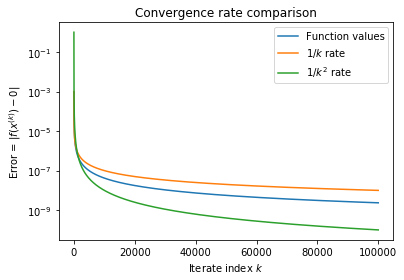

In [9]:
# Illustrating the slow rate of convergence for backtracking

fun = lambda x: x**10
dfun = lambda x: 10*(x**9)

x = -0.5 # initial guess

iterations = 100000
alpha = 0.4
beta = 0.8

iterates = np.zeros(iterations+1)
iterate_values = np.zeros(iterations+1)

iterates[0] = x
iterate_values[0] = fun(x)

for i in range(iterations):
    x = backtracking1D(x, -dfun(x), fun, dfun(x), alpha=alpha, beta=beta)
    iterates[i+1] = x
    iterate_values[i+1] = fun(x)
    
idx = np.array(list(range(iterations)))+1
p1, = plt.semilogy(iterate_values, label='Function values')
p2, = plt.semilogy(0.001/idx, label = '$1/k$ rate')
p3, = plt.semilogy(1/(idx**2), label = '$1/k^2$ rate')
plt.title('Convergence rate comparison')
plt.legend(handles=[p1, p2, p3])
plt.ylabel('Error = $| f(x^{(k)}) - 0 |$')
plt.xlabel('Iterate index $k$')
plt.show()

This gap leads us to consider **accelerated** methods that may converge more rapidly. In particular, if we use data from two previous iterates, we can attain the optimal theoretical rate.

In backtracking...
9
9
3.2400000000000024


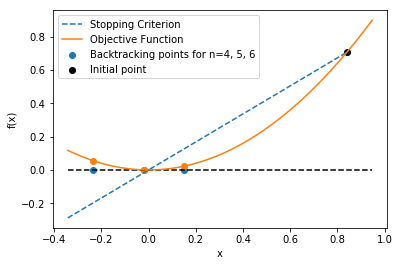

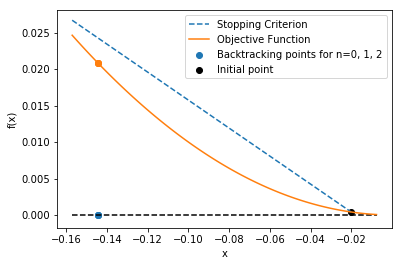

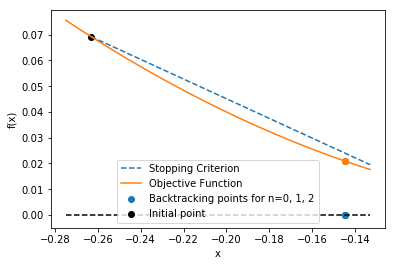

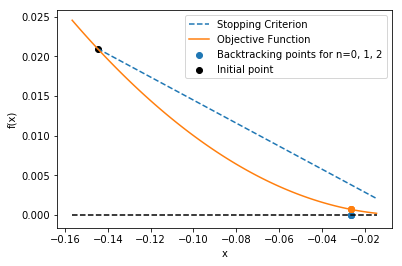

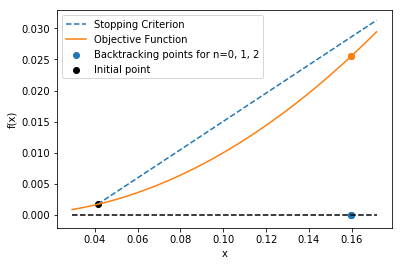

In [10]:
def accelerated_backtracking1D(k, tk, x0, x1, dx, f, df, beta=0.8, verbose=False):
    '''
    Accelerated backtracking for 1D functions with illustrations
    :param k: Index of the current accelerated backtracking iteration; k=1 for the first
    :param tk: The t from the previous accelerated backtracking iteration; tk=1 for the first
    :param x0: Next most recent point from accelerated backtracking
    :param x1: Most recent point from accelerated backtracking; x1=x0 for the first iteration
    :param dx: Incremental factor for updating x1
    :param f: Objective function
    :param df: Derivative function of f
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots to illustrate
    :return: x, t the next iterate and initial t in accelerated backtracking
    '''
    
    y = x1 + (k-1)*(x1 - x0)/(k+2) # Base point for accelerated backtracking
    
    if verbose:
        n=0
        xs = [y + tk*dx] * 3
    
    t = tk # Initialize t from the last iteration; t_0=1
    x = y + t*dx
    fx = f(x)
    fy = f(y)
    dfy = df(y)
    delta = dfy * dx

    
    while (not np.isfinite(fx)) or fy + delta*t + t*dx**2/2 < fx:
        t = beta * t
        x = y + t*dx
        fx = f(x)
    
        if verbose:
            n += 1
            xs.append(x)
            xs.pop(0)
            
    if verbose: 
        u = 1.1 * np.abs(xs[0] - y)
        l = 0.1 * np.abs(xs[0] - y)
        if dx < 0:
            s = np.linspace(y - u, y + l, 100)
            xi = np.linspace(y-u, y, 100)
        else:
            s = np.linspace(y - l, y + u, 100)
            xi = np.linspace(y, y + u, 100)
        dxi = xi-y
        fxi = fy + dfy*dxi + dxi*dx/2
            
        z = np.zeros(len(s))
        for i in range(len(s)):
            z[i] = f(s[i]) # Slow for vectorized functions
            
        plt.figure('Accelerated Backtracking illustration')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        arm, =plt.plot(xi, fxi, '--', label='Stopping Criterion')
        fcn, =plt.plot(s, z, label='Objective Function')
        pts =plt.scatter(xs, [0 for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(xs, [f(p) for p in xs], label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([y], [fy], label='Initial point', color='black')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.show()
    
    return x, t

fun = lambda x: x**2
dfun = lambda x: 2*x

x0 = -3
x1 = backtracking1D(x0, -dfun(x0), fun, dfun(x0))
dx = -dfun(x1)
t0 = 1
beta = 0.8

x2, t1 = accelerated_backtracking1D(1, t0, x0, x1, dx, fun, dfun, beta=beta, verbose=True)
x3, t2 = accelerated_backtracking1D(2, t1, x1, x2, -dfun(x2), fun, dfun, beta=beta, verbose=True)
x4, t3 = accelerated_backtracking1D(3, t2, x2, x3, -dfun(x3), fun, dfun, beta=beta, verbose=True)
x5, t4 = accelerated_backtracking1D(4, t3, x3, x4, -dfun(x3), fun, dfun, beta=beta, verbose=True)
x6, t5 = accelerated_backtracking1D(5, t4, x4, x5, -dfun(x3), fun, dfun, beta=beta, verbose=True)


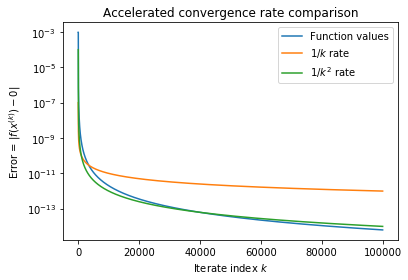

In [11]:
# Illustrating the slow rate of convergence for backtracking

fun = lambda x: x**10
dfun = lambda x: 10*(x**9)

x = -0.5 # initial guess

iterations = 100000
alpha = 0.4
beta = 0.8

iterates = np.zeros(iterations)
iterate_values = np.zeros(iterations)

iterates[0] = x
iterates[1] = x
iterate_values[0] = fun(x)
iterate_values[1] = fun(x)

t = 1

for i in range(2, iterations):
    x, t = accelerated_backtracking1D(i+1, t, iterates[i-2], iterates[i-1], -dfun(iterates[i-1]), fun, dfun, beta=beta)
    iterates[i] = x
    iterate_values[i] = fun(x)
    
idx = np.array(list(range(iterations)))+1
p1, = plt.semilogy(iterate_values, label='Function values')
p2, = plt.semilogy(0.0000001/idx, label = '$1/k$ rate')
p3, = plt.semilogy(0.0001/(idx**2), label = '$1/k^2$ rate')
plt.title('Accelerated convergence rate comparison')
plt.legend(handles=[p1, p2, p3])
plt.ylabel('Error = $| f(x^{(k)}) - 0 |$')
plt.xlabel('Iterate index $k$')
plt.show()

We can see that acceleration manages to compensate for small derivatives. In particular, we see that accelerated steepest descent has a rate better than $\mathcal{O}(1/k^2)$ *in this particular case*. The theory also shows that accelerated backtracking achieves the optimal rate.

### Theorem: Suppose $f\in C^2(\mathbb{R})$ is convex, $x^\ast$ minimizes $f$ over $\mathbb{R}$, and that there is an $M>0$ such that $\vert f^{\prime\prime}(x)\vert\leq M$ for all $x\in\mathbb{R}$. Then, for the sequence $x^{(1)}, x^{(2)}, x^{(3)},\ldots$ produced by accelerated backtracking, there is a constant $C>0$ such that
$$
f(x^{(k)})-f(x^\ast) \leq \frac{C}{k^2}.
$$

# Part VI: Algorithmic Solutions

What if the value of the function is less important than convergence to a minimizer? In this case, methods like **Fibonnaci search** and **golden section search** are able to provide nearly optimal approximations to solutions given a fixed number of function evaluations. We will not consider these algorithms, and instead we will focus on techniques that leverage backtracking.

## Steepest descent with constant step size

Instead of employing backtracking, we can simply choose a parameter $\tau\in (0,1)$ to produce iterates of the form
$$
x^{(k+1)}=x^{(k)} - \tau f(x^{(k)}).
$$
This is called **damped steepest descent**, or steepest descent with constant step size. While it may not be the most efficient procedure, it can be analyzed a little more easily.

### Theorem: Suppose $f\in C^2(\mathbb{R})$ and there is an $M>0$ and a $c>0$ such that $c<f^{\prime\prime}(x)<M$ for all $x\in\mathbb{R}$. Then there is a $\gamma\in(0,1)$ such that the sequence $x^{(k+1)} = x^{(k)} - \frac{1}{M}f^\prime(x^{(k)})$ satisfies $\vert x^{(k+1)}-x^\ast\vert \leq \gamma\vert x^{(k)}-x^\ast\vert$ for all $k$ given any initial $x^{(0)}$.

The proof uses the Mean Value Theorem:

$$
x^\ast - x^{(k+1)} = x^\ast - x^{(k)} + \frac{1}{M} f^\prime(x^{(k)})=x^\ast - x^{(k)} + \frac{1}{M} f^{\prime\prime}(\xi)(x^{(k)}-x^\ast) = \left(1 - \frac{1}{M} f^{\prime\prime}(\xi)\right)(x^\ast - x^{(k)})
$$
for some $\xi$ between $x^{(k)}$ and $x^\ast$, and hence
$$
\vert x^\ast - x^{(k+1)}\vert = \left\vert 1-\frac{1}{M} f^{\prime\prime}(\xi)\right\vert \vert x^\ast - x^{(k)}\vert.
$$
The inequality $c< f^{\prime\prime}(\xi) < M$ implies $\frac{c}{M}< \frac{f^{\prime\prime}(\xi)}{M} < 1$, and hence $0<1-\frac{f^{\prime\prime}(\xi)}{M}< 1- \frac{c}{M}<1$. We conclude that the theorem holds with $\gamma=1-\frac{c}{M}$.

We call the quantity $\vert x^{(k)}-x^\ast\vert$ the **error** of the approximation $x^{(k)}$ to $x^\ast$. The type of convergence discussed in the previous theorem is called **linear convergence** of the error, though it is also sometimes called **exponential convergence** since it implies that the error decays exponentially:
$$
\vert x^{(k)}-x^\ast\vert \leq \gamma^k\vert x^{(0)}-x^\ast\vert.
$$


## Newton's method

Newton's method is a way to get even faster convergence to solutions, but it requires evaluation of $f^{\prime\prime}$ at each step. The Newton iterates are defined by
$$
x^{(k+1)} = x^{(k)} - \frac{f^\prime(x^{(k)})}{f^{\prime\prime}(x^{(k)})}
$$
We let $C^3(\mathbb{R})$ denote the space of functions over $\mathbb{R}$ with three continuous derivatives.

### Theorem (Quadratic Convergence of Newton's Method): Suppose $f\in C^3(\mathbb{R})$, $f^\prime(x^\ast)=0$, there is a constant $c>0$ such that $f^{\prime\prime}(x^\ast)\geq c$, and there is a constant $K>0$ such that $\vert f^{\prime\prime\prime}(x)\vert \leq K$ for all $x\in\mathbb{R}$. If $x^{(0)}$ satisfies $\vert x^{(0)}-x^\ast\vert\leq \frac{2c}{3k}$, then the Newton iterates initialized with $x^{(0)}$ satisfy $\vert x^{(k)}-x^\ast\vert\leq \frac{2c}{3K}$ and $\vert x^{(k+1)} - x^\ast\vert \leq \frac{3K}{2c} \vert x^{(k)}-x^\ast\vert^2$ for all $k\geq 0$. 

The **quadratic convergence** here is also known as **doubly exponential convergence** since it implies 
$$
\vert x^{(k)}-x^\ast\vert \leq \gamma^{2^k-1}\vert x^{(0)}-x^\ast\vert
$$
for some $\gamma\in(0,1)$. However, convergence in this theorem is contingent on the fact that $\vert x^{(0)}-x^\ast\vert < \frac{2c}{3K}$. It turns out that Newton's method may produce an unbounded sequence of iterates. On the other hand, we can always feed the $\Delta x$ from Newton's method to backtracking to stabilize Newton's method. 

The following plots illustrate convergence rates for iterates and function values for these procedures.

In [7]:
x = np.log(1 - 9*np.log(10)/np.log(9/10))/np.log(2)

print(x)

7.62708957499


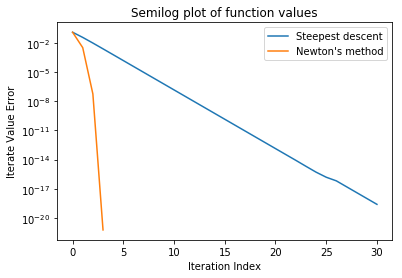

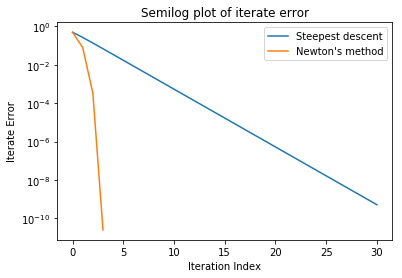

In backtracking...
0.000660602713172
In backtracking...
1.28008028577e-10
In backtracking...
1.86448417042e-30
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.00316152756489
In backtracking...
5.62137829966e-08
In backtracking...
6.3159096614e-22
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.0
In backtracking...
0.

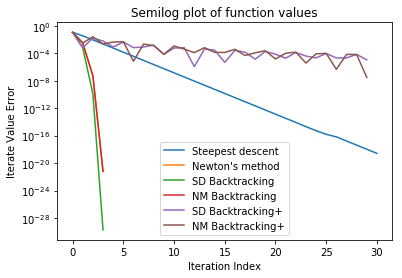

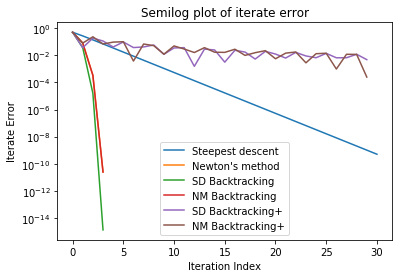

In [12]:
'''
Example 03: f(x) = x*arctan(x) - log(1+x^2)/2, f'(x)=arctan(x), f''(x)=1/(1+x^2)
'''

f = lambda x: x * np.arctan(x) - np.log(1+x**2)/2 # minimum value is 0 at x=0
df = lambda x: np.arctan(x)
d2f = lambda x: 1/(1+x**2) # Note that M=1, but strong convexity does not hold

iter = 30 # 30 iterations of each
x0 = 0.5

x_sd = [x0]
f_sd = [f(x0)]
x = x0
for i in range(iter):
    x = x - df(x)/2 # Using the constant stepsize 2 > 1
    x_sd.append(x)
    f_sd.append(f(x))
    
x_nm = [x0]
f_nm = [f(x0)]
x = x0
for i in range(iter):
    x = x - df(x)/d2f(x) # Using the constant stepsize 2 > 1
    x_nm.append(x)
    f_nm.append(f(x))
    
# Compare convergence of function values with semilog plot
sd, =plt.semilogy(f_sd, label='Steepest descent')
nm, =plt.semilogy(f_nm, label='Newton\'s method')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Value Error')
plt.legend(handles=[sd, nm])
plt.title('Semilog plot of function values')
plt.show()

# Compare convergece of iterates to the minimizer
sd, =plt.semilogy(np.abs(x_sd), label='Steepest descent')
nm, =plt.semilogy(np.abs(x_nm), label='Newton\'s method')
plt.ylabel('Iterate Error')
plt.xlabel('Iteration Index')
plt.legend(handles=[sd, nm])
plt.title('Semilog plot of iterate error')
plt.show()

# Let's finish with a comparison with backtracking and accelerated backtracking

x_sd_bt = [x0]
f_sd_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x), f, df(x))
    x_sd_bt.append(x)
    f_sd_bt.append(f(x))

x_nm_bt = [x0]
f_nm_bt = [f(x0)]
x = x0
for i in range(iter):
    x = backtracking1D(x, -df(x)/d2f(x), f, df(x))
    x_nm_bt.append(x)
    f_nm_bt.append(f(x))
    
x_sd_abt = [x0]
f_sd_abt = [f(x0)]
x = backtracking1D(x0, -df(x0), f, df(x0))
x_sd_abt.append(x)
f_sd_abt.append(f(x))
t = 1
for i in range(2,iter):
    x, t = accelerated_backtracking1D(i+1, t, x_sd_abt[i-2], x_sd_abt[i-1], -df(x), f, df)
    x_sd_abt.append(x)
    f_sd_abt.append(f(x))

x_nm_abt = [x0]
f_nm_abt = [f(x0)]
x = backtracking1D(x0, -df(x0)/d2f(x0), f, df(x0))
x_nm_abt.append(x)
f_nm_abt.append(f(x))
t = 1
for i in range(2, iter):
    x, t = accelerated_backtracking1D(i+1, t, x_nm_abt[i-2], x_nm_abt[i-1], -df(x)/d2f(x), f, df)
    x_nm_abt.append(x)
    f_nm_abt.append(f(x))

# Compare convergence of function values with semilog plot
sd, =plt.semilogy(f_sd, label='Steepest descent')
nm, =plt.semilogy(f_nm, label='Newton\'s method')
sd_bt, = plt.semilogy(f_sd_bt, label='SD Backtracking')
nm_bt, = plt.semilogy(f_nm_bt, label='NM Backtracking')
sd_abt, = plt.semilogy(f_sd_abt, label='SD Backtracking+')
nm_abt, = plt.semilogy(f_nm_abt, label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Value Error')
plt.legend(handles=[sd, nm, sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of function values')
plt.show()

# Compare convergece of iterates to the minimizer
sd, =plt.semilogy(np.abs(x_sd), label='Steepest descent')
nm, =plt.semilogy(np.abs(x_nm), label='Newton\'s method')
sd_bt, = plt.semilogy(np.abs(x_sd_bt), label='SD Backtracking')
nm_bt, = plt.semilogy(np.abs(x_nm_bt), label='NM Backtracking')
sd_abt, = plt.semilogy(np.abs(x_sd_abt), label='SD Backtracking+')
nm_abt, = plt.semilogy(np.abs(x_nm_abt), label='NM Backtracking+')
plt.xlabel('Iteration Index')
plt.ylabel('Iterate Error')
plt.legend(handles=[sd, nm, sd_bt, nm_bt, sd_abt, nm_abt])
plt.title('Semilog plot of iterate error')
plt.show()

## Team Problems

1. Write down a function $f\in C^1(\mathbb{R})$ and an initial point $x^{(0)}$ such that backtracking with steepest descent does not produce a sequence which converges to the *global minimizer* of $f$ over $\mathbb{R}$.
2. Write down a function $f\in C^1(\mathbb{R})$ and an initial point $x^{(0)}$ such that backtracking with steepest descent does not produce a sequence which converges to a *local minimizer* of $f$ over $\mathbb{R}$.
3. Suppose you code up a function ``fun`` and its derivative ``dfun`` in python, and you observe that backtracking at a particular $x^{(0)}$ produces the iterates $x^{(1)}=x^{(0)}$, $x^{(2)}=x^{(0)}$, and so forth. That is, backtracking does not move from $x^{(0)}$. What are two possible reasons for this?
4. Can backtracking with steepest descent ever converge more rapidly than accelerated backtracking with steepest descent?
5. Does accelerated backtracking produce a sequence of iterates for which the iterate values are monotone decreasing?
6. If an iterative method converges linearly, what should a semilog plot of the error as a function of the iteration index look like? What about if the method converges quadratically?
7. In the above plots, why does backtracking with steepest descent appear to converge quadratically?
8. In the above example, why does simple backtracking have a faster convergence rate than accelerated backtracking?

# Part VII: Constrained Univariate Optimization

All of the numerical procedures we have considered so far involve the numerical minimization over $\mathbb{R}$. If we are instead optimizing over $[a, b]$ for some $a, b\in\mathbb{R}$ with $a<b$, then we need to ensure that our iterative methods always return a new point in $[a,b]$. Clearly, backtracking may be modified to be careful of such constraints, but the **log barrier method** also provides a way to carry out optimization in the constrained setting.

Instead of solving
$$
\min f(x)\text{ subject to }x\in[a,b]
$$
we solve a sequence of programs
$$
\min f(x)-\frac{1}{t}\log(x-a)-\frac{1}{t}\log(b-x)
$$
where $t\rightarrow\infty$. The benefit here is that these functions produce NaNs if $x\leq a$ or $x\geq b$, which we can catch in the backtracking loop using the ``not np.isfinite(fx)`` conditional. 

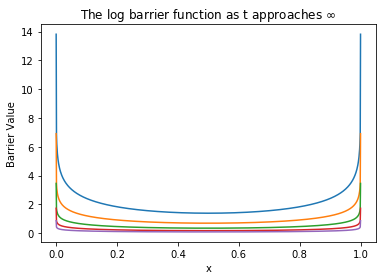

In backtracking...
nan
nan
nan
nan
nan
2.55633095386
1.75739646836
In backtracking...
1.56977823987
1.56977823987
1.48110239335
In backtracking...
1.46199112401
1.46199112401
1.43760163296
In backtracking...
1.43153752963
1.43153752963
1.42391330858
In backtracking...
1.42197175624
1.42197175624
1.41987934019


/Users/n8/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log


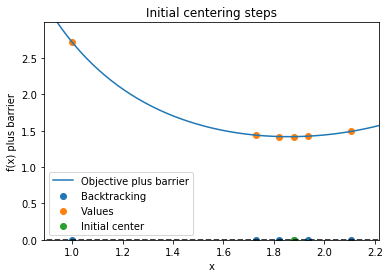

In backtracking...
1.80628339961
In backtracking...
1.80620204569
In backtracking...
1.80620140652
In backtracking...
1.80620140082
In backtracking...
1.80620140077
In backtracking...
1.80620140077
In backtracking...
1.80620140077
In backtracking...
1.80620140077
In backtracking...
1.80620140077
1.80620140077
1.80620140077
In backtracking...
1.80620140077
In backtracking...
1.80620140077
1.80620140077
In backtracking...
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.80620140077
1.

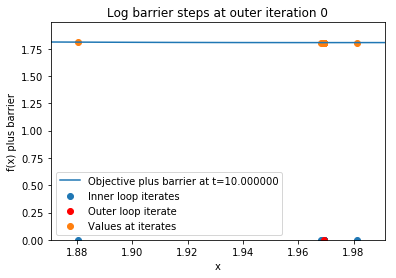

In backtracking...
1.84320419296
In backtracking...
1.84320346065
In backtracking...
1.84320345818
In backtracking...
1.84320345817
In backtracking...
1.84320345817
In backtracking...
1.84320345817
In backtracking...
1.84320345817
1.84320345817
1.84320345817
1.84320345817
In backtracking...
1.84320345817
In backtracking...
1.84320345817
In backtracking...
1.84320345817
1.84320345817
In backtracking...
1.84320345817
1.84320345817
In backtracking...
1.84320345817
1.84320345817
1.84320345817
In backtracking...
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
In backtracking...
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
In backtracking...
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1.84320345817
1

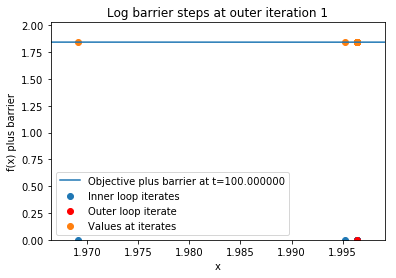

In backtracking...
1.8468585247
In backtracking...
1.84685849972
In backtracking...
1.84685849958
In backtracking...
1.84685849958
In backtracking...
1.84685849958
In backtracking...
1.84685849958
In backtracking...
1.84685849958
In backtracking...
1.84685849958
In backtracking...
1.84685849958
In backtracking...
1.84685849958
In backtracking...
1.84685849958
1.84685849958
In backtracking...
1.84685849958
In backtracking...
1.84685849958
In backtracking...
1.84685849958
1.84685849958
1.84685849958
1.84685849958
In backtracking...
1.84685849958
1.84685849958
1.84685849958
1.84685849958


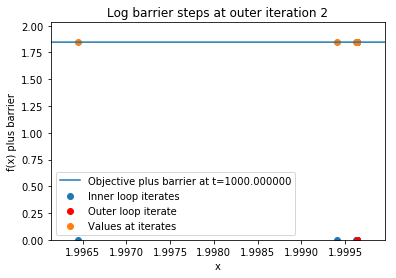

In backtracking...
1.8472234779
In backtracking...
1.84722347762
In backtracking...
1.84722347762
In backtracking...
1.84722347762
In backtracking...
1.84722347762
In backtracking...
1.84722347762
In backtracking...
1.84722347762
In backtracking...
1.84722347762
In backtracking...
1.84722347762
In backtracking...
1.84722347762
In backtracking...
1.84722347762
In backtracking...
1.84722347762
In backtracking...
1.84722347762
In backtracking...
1.84722347762
In backtracking...
1.84722347762


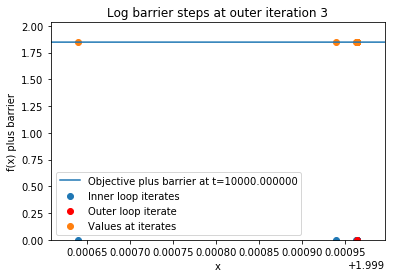

In [13]:
def lb1D(x, a, b):
    '''
    Log barrier value of x between a and b
    :param x: x between a and b
    :param a: lower endpoint
    :param b: upper endpoint
    :return: evaluation of the log barrier function
    '''
    return -np.log(x-a)-np.log(b-x)

def dlb1D(x, a, b):
    '''
    Log barrier derivative at x between a and b
    :param x: x between a and b
    :param a: lower endpoint
    :param b: upper endpoint
    :return: evaluation of the log barrier derivative
    '''
    return 1/(b-x) - 1/(x-a)

def d2lb1D(x, a, b):
    '''
    Log barrier 2nd derivative x between a and b
    :param x: x between a and b
    :param a: lower endpoint
    :param b: upper endpoint
    :return: evaluation of the log barrier 2nd derivative
    '''
    return 1/((b-x)**2) + 1/((x-a)**2)

a=0
b=1
x = np.linspace(a+1e-6, b-1e-6, 1000)
lb = lambda z: lb1D(z, a=0, b=1)
y = lb(x)

plt.figure('Log Barrier Function')
plt.plot(x, lb(x))
plt.plot(x, lb(x)/2)
plt.plot(x, lb(x)/4)
plt.plot(x, lb(x)/8)
plt.plot(x, lb(x)/16)
plt.xlabel('x')
plt.ylabel('Barrier Value')
plt.title('The log barrier function as t approaches $\infty$')
plt.show()

def log_barrier_opt_1D(a, b, x0, f, df, d2f=None, al=0.2, be=0.8, M=10, init_iter=5, out_iter=25, in_iter=15, verbose=False):
    '''
    Perform optimization of f using the log barrier method in 1D
    :param a: lower bound of feasible region
    :param b: upper bound of feasible region
    :param x0: inital guess -- must satisfy a < x0 < b or this breaks
    :param f: objective function
    :param df: derivative of objective function
    :param d2f: optional second derivative, invokes Newton steps
    :param al: alpha for the backtracking calls
    :param be: beta for the backtracking calls
    :param M: increase factor for t
    :param init_iter: number of initial backtracking calls
    :param out_iter: number of outer iterations to perform
    :param in_iter: number of inner iterations to perform
    :param verbose: True generates illustrative plots
    '''
    
    # First, approximate the solution with t=1
    x = x0
    if verbose:
        pts = [x0]
    
    for i in range(init_iter):
        flb = lambda z: f(z) + lb1D(z, a, b)
        dflb0 = df(x) + dlb1D(x, a, b)
        dx = -dflb0
        if d2f is not None:
            dx = dx / (d2f(x) + d2lb1D(x, a, b))
        x = backtracking1D(x, dx, flb, dflb0, alpha=al, beta=be)
        if verbose:
            pts.append(x)
            
    if verbose:
        s = np.linspace(a+1e-6, b-1e-6, 100)
        y = np.zeros(100)
        q = np.zeros(len(pts))
        for i in range(100):
            y[i] = flb(s[i])
        for i in range(len(pts)):
            q[i] = flb(pts[i])
        
        fl = min(np.min(q), 0)
        fu = max(np.max(q), 0)
            
        interval_length = np.max(pts) - np.min(pts)
        range_length = fu - fl
            
        l = np.min(pts) - 0.1*interval_length
        u = np.max(pts) + 0.1*interval_length
        fl = np.min(q) - 0.1*range_length
        fu = np.max(q) + 0.1*range_length
        
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        obj, =plt.plot(s, y, label='Objective plus barrier')
        bt =plt.scatter(pts, np.zeros(len(pts)), label='Backtracking')
        vals =plt.scatter(pts, q, label='Values')
        init =plt.scatter([pts[-1]], 0, label='Initial center')
        plt.axis([l, u, min(fl,0), max(fu,0)])
        plt.legend(handles=[obj, bt, vals, init])
        plt.xlabel('x')
        plt.ylabel('f(x) plus barrier')
        plt.title('Initial centering steps')
        plt.show()
    
    # Now begin the outer iterations
    t=1
    for i in range(out_iter):
        t = M * t
        if verbose:
            pts = [x]
        for j in range(in_iter):
            flb = lambda z: f(z) + lb1D(z, a, b)/t
            dflb0 = df(x) + dlb1D(x, a, b)/t
            dx = -dflb0
            if d2f is not None:
                dx = dx / (d2f(x) + d2lb1D(x, a, b)/t)
            x = backtracking1D(x, dx, flb, dflb0, alpha=al, beta=be)
            pts.append(x)
            
        if verbose:
            s = np.linspace(a+1e-6, b-1e-6, 100)
            y = np.zeros(100)
            q = np.zeros(len(pts))
            for k in range(100):
                y[k] = flb(s[k])
            for k in range(len(pts)):
                q[k] = flb(pts[k])
                
            fl = min(np.min(q), 0)
            fu = max(np.max(q), 0)
            
            interval_length = np.max(pts) - np.min(pts)
            range_length = fu - fl
            
            l = np.min(pts) - 0.1*interval_length
            u = np.max(pts) + 0.1*interval_length
            fl = np.min(q) - 0.1*range_length
            fu = np.max(q) + 0.1*range_length
        
            obj, =plt.plot(s, y, label=('Objective plus barrier at t=%f' % t))
            bt =plt.scatter(pts, np.zeros(len(pts)), label='Inner loop iterates')
            outer =plt.scatter([pts[-1]], 0, label='Outer loop iterate', color='red')
            vals =plt.scatter(pts, q, label='Values at iterates')
            plt.axis([l, u, min(fl, 0), max(fu, 0)])
            plt.legend(handles=[obj, bt, outer, vals])
            plt.xlabel('x')
            plt.ylabel('f(x) plus barrier')
            plt.title('Log barrier steps at outer iteration %d' % i)
            plt.show()
            
    return x

a=0.5
b=3
x0=1
f=lambda x: np.exp(x)/(x**2)
df=lambda x: f(x) - 2* np.exp(x)/(x**3)

x_approx = log_barrier_opt_1D(a, b, x0, f, df, verbose=True, out_iter=4)


## Team Problems

1. Perform one step of backtracking use steepest descent increments on the function $f(x)=x^4+x^2+1$ with $x^{(0)}=1$.
2. Perform one step of backtracking use Newton's method increments on the function $f(x)=x^4+x^2+1$ with $x^{(0)}=1$.
2. Perform one step of backtracking using steepest descent increments on the function $f(x)=x^2-\log(x-1)-\log(3-x)$ with $x^{(0)}=2$
4. Perform one step of backtracking using Newton's method increments on the function $f(x)=x^2-\log(x-1)-\log(3-x)$ with $x^{(0)}=2$?
5. Perform one step of backtracking using steepest descent increments on the function $f(x)=x^2-\frac{1}{2}\log(x-1)-\frac{1}{2}\log(3-x)$ with $x^{(0)}=3/2$
6. Perform one step of backtracking using Newton's method increments on the function $f(x)=x^2-\frac{1}{2}\log(x-1)-\frac{1}{4}\log(3-x)$ with $x^{(0)}=3/2$
7. Perform one step of backtracking using steepest descent increments on the function $f(x)=x^2-\frac{1}{4}\log(x-1)-\frac{1}{4}\log(3-x)$ with $x^{(0)}=5/4$
8. Perform one step of backtracking using Newton's method  increments on the function $f(x)=x^2-\frac{1}{4}\log(x-1)-\frac{1}{4}\log(3-x)$ with $x^{(0)}=5/4$

# Part VIII: Stochastic Descent


## Maximum Likelihood Problems

We will encounter many optimization problems which have a form analgous to
$$
\min_{\theta\in\mathbb{R}} \frac{1}{N}\sum_{i=1}^Nf(\theta;\:\theta^{(i)})
$$
where $f:\mathbb{R}\times\mathbb{R}\rightarrow\mathbb{R}$ is a function of a parameter $\theta$ and a point of data $\theta^{(i)}$. For example, suppose that we know that each of the data points $\theta^{(i)}$ is drawn from a **normal distribution** with unknown mean and unit variance? This is denoted $\theta^{(i)}\sim \mathcal{N}(\bullet;\theta,1)$. Here, 
$$
\mathcal{N}(x;\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$
is the probability density function (PDF) of the normal distribution with mean $\mu\in\mathbb{R}$ and variance $\sigma^2$, and $\xi\sim\mathcal{N}(x;\mu,\sigma^2)$ indicates that
$$
\text{Prob}(a\leq \xi\leq b) = \int_a^b \mathcal{N}(x;\mu,\sigma^2)\:dx.
$$
The PDF is also referred to as the **likelihood function**. One further assumption is that **each draw of** $\theta^{(i)}$ **is independent**, and therefore the probability of a simultaneous (rectangular!) event has a multiplicative formula:
$$
\text{Prob}\left(a_i\leq \theta^{(i)}\leq b_i\text{ for all }i=1,2,\ldots, N\right)=\prod_{i=1}^N \text{Prob}(a_i\leq\theta^{(i)}\leq b_i).
$$
Equivalently, the likelihood function of the entire seqence $\theta^{(1)}, \theta^{(2)}, \theta^{(3)}, \ldots, \theta^{(N)}$ is
$$
\mathcal{L}(\theta\:;\theta^{(1)}, \theta^{(2)}, \theta^{(3)}, \ldots, \theta^{(N)}) = \prod_{i=1}^N \mathcal{N}(\theta^{(i)};\theta,1)
$$
The **maximum likelihood principle** states that the best estimate for the true parameter $\theta$ given the data is the value which solves
$$
\max_{\theta\in\mathbb{R}} \mathcal{L}(\theta\:;\theta^{(1)}, \theta^{(2)}, \theta^{(3)}, \ldots, \theta^{(N)}).
$$
Taking the negative of the logarithm gives us the **negative log-likelihood** function 
$$
\ell(\theta\:;\theta^{(1)}, \theta^{(2)}, \theta^{(3)}, \ldots, \theta^{(N)})=-\log\mathcal{L}(\theta\:;\theta^{(1)}, \theta^{(2)}, \theta^{(3)}, \ldots, \theta^{(N)})
$$
and we quickly see that
$$
\ell(\theta\:;\theta^{(1)}, \theta^{(2)}, \theta^{(3)}, \ldots, \theta^{(N)}) = \sum_{i=1}^N \frac{1}{2}\log(2\pi) + \frac{1}{2}(\theta^{(i)}-\theta)^2
$$
since
$$
-\log \mathcal{N}(\theta^{(i)}\:;\theta,\sigma^2)=-\log \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(\theta^{(i)}-\theta)^2}=\frac{1}{2}\log(2\pi) +\frac{1}{2}(\theta^{(i)}-\theta)^2.
$$
The negative log function is **strictly order reversing** and therefore minimization of the negative log-likelihood,
$$
\min_{\theta\in\mathbb{R}} \ell(\theta\:;\theta^{(1)}, \theta^{(2)}, \theta^{(3)}, \ldots, \theta^{(N)}),
$$
is equivalent to maximimizing the the original likelihood function. Finally, we note that 
$$
\min f(x)\text{ and } \min af(x)+b
$$
are equivalent optimization programs for all $a,b\in\mathbb{R}$ with $a\not=0$, and therefore minimization of the negative log-likelihood function is equivalent to
$$
\min_{\theta\in\mathbb{R}} \frac{1}{N}\sum_{i=1}^N (\theta^{(i)}-\theta)^2
$$
In this particular instance, the optimal value is $\theta^\ast=\frac{1}{N}\sum_{i=1}^N\theta^{(i)}$.

## Stochastic descent directions

Not all such minimization problems are tractable. For example, suppose $y^{(i)}=-1$ or $1$ depends on some real number $x^{(i)}$ so that the conditional probability is
$$
\text{Prob}(y^{(i)}=1\vert\: x^{(i)};\alpha)=\frac{1}{1+e^{-\alpha x^{(i)}}},
$$
where $\alpha$ is some unknown parameter that we need to estimate. Recall that the **logit function** is
$$
\text{logit}(x) = \frac{1}{1+e^{-x}},
$$
so 
$$
\text{Prob}(y^{(i)}=1\vert\: x^{(i)};\alpha) = \text{logit}(\alpha x^{(i)})
$$
and
$$
\text{Prob}(y^{(i)}=-1\vert\: x^{(i)};\alpha) = \text{logit}(-\alpha x^{(i)})
$$
The data we acquire is of the form $(x^{(i)}, y^{(i)})\in\mathbb{R}\times\{-1,1\}$. Assuming independence of the draws $y^{(i)}$, the maximum likelihood principle leads us the program
$$
\max_{\alpha\in\mathbb{R}} \prod_{i=1}^N \text{logit}(\alpha x^{(i)} y^{(i)}).
$$
Taking the negative log and rescaling yields the equivalent program
$$
\min_{\alpha\in\mathbb{R}} \frac{1}{N}\sum_{i=1}^N \log\left(1+e^{-\alpha x^{(i)}y^{(i)}}\right)
$$
Let's explore the behavior of the function $\phi(x)=\log(1+e^{-x})$. Taking derivatives, we have
$$
\phi^\prime(x) = -\frac{e^{-x}}{1+e^{-x}} = -\text{logit}(-x)
$$
and
$$
\phi^{\prime\prime}(x) = \frac{e^x}{\left(1+e^x\right)^2}=\text{logit}(x)\text{logit}(-x).
$$
Note that this last quantity is always positive, so we have that $\phi$ is strictly convex on $\mathbb{R}$. Since
$$
\Phi(\alpha)=\frac{1}{N}\sum_{i=1}^N -\log\left(1+e^{-\alpha x^{(i)}y^{(i)}}\right)=\frac{1}{N}\sum_{i=1}^N\phi\left(\alpha x^{(i)}y^{(i)}\right)
$$
we see that each $\phi\left(\alpha x^{(i)}y^{(i)}\right)$ is convex since they are all compositions of a convex function with an affine function, and therefore $\Phi(\alpha)$ is convex function since it is a sum of convex functions. From our previous calculations, we also know that
$$
\Phi^\prime(\alpha) = -\frac{1}{N}\sum_{i=1}^N x^{(i)}y^{(i)}\text{logit}\left(-\alpha x^{(i)}y^{(i)}\right)
$$
and
$$
\Phi^{\prime\prime}(\alpha) = \frac{1}{N}\sum_{i=1}^N \left(x^{(i)}y^{(i)}\right)^2\text{logit}\left(-\alpha x^{(i)}y^{(i)}\right)\text{logit}\left(\alpha x^{(i)}y^{(i)}\right)=\frac{1}{N}\sum_{i=1}^N\left(x^{(i)}\right)^2\text{logit}\left(-\alpha x^{(i)}\right)\text{logit}\left(\alpha x^{(i)}\right)
$$
Solving $\Phi^\prime(\alpha)=0$ is intractable, so this is a perfect candidate for an iterative method. However, we may have a **big data** problem and therefore computation of the full sum may be quite expensive. 

To overcome our data problem, we will create iterates of the form
$$
\alpha^{(k+1)} = \alpha^{(k)} + \gamma^{(k)}\Delta\alpha^{(k)}
$$
where
$$
\Delta\alpha^{(k)} = -\Phi_Q^\prime(\alpha^{(k)})=\frac{1}{M} \sum_{j=1}^M x^{(i^{(j)})}y^{(i^{(j)})}\text{logit}\left(-\alpha^{(k)}x^{(i^{(j)})}y^{(i^{(j)})}\right)
$$
and $Q=\{i^{(1)}, i^{(2)}, i^{(3)},\ldots,i^{(M)}\}\subset\{1,2,3,\ldots, N\}$ is a random subset of the indices from $1$ to $N$. The reason we expect this to work is because the **expected value** of $\Delta\alpha^{(k)}$ is the steepest descent increment.

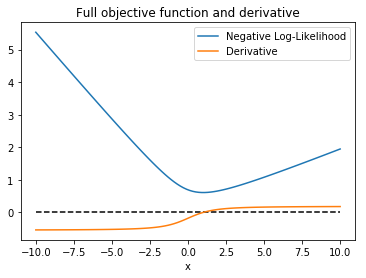

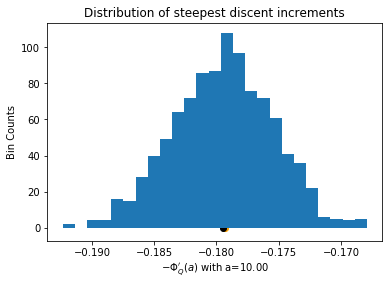

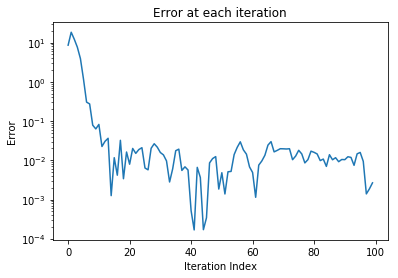

In [14]:
import numpy.random as rd

def logit(x):
    return 1/(1+np.exp(-x))

def phi(x):
    return np.log(1+np.exp(-x))

def dphi(x):
    return -logit(-x)

def d2phi(x):
    return logit(x) * logit(-x)

def rand_logit_data(alpha, N, num_nodes=25):
    X = rd.randn(num_nodes)
    x = np.zeros(N)
    y = np.zeros(N)
    
    for i in range(N):
        k = rd.choice(num_nodes) # pick one random index
        p = rd.rand()
        x[i] = X[k]
        if p < logit(alpha*x[i]):
            y[i] = 1
        else:
            y[i] = -1
            
    return x, y

N = 1000000 # 1 Million data points
M = 10000 # Use 10,000 data points in each stochastic step
alpha_ast = 1.0
steps = 100

x, y = rand_logit_data(alpha_ast, N)
alpha_0 = 10.0

s = np.linspace(-10, 10, 100)
obj_fun = np.zeros(100)
d_obj_fun = np.zeros(100)
for i in range(100):
    obj_fun[i] = np.mean(phi(s[i] * x * y))
    d_obj_fun[i] = np.mean(x*y*dphi(s[i] * x * y))

plt.plot([-10, 10], [0, 0], 'k--')
fun_plt, =plt.plot(s, obj_fun, label='Negative Log-Likelihood')
dfun_plt, =plt.plot(s, d_obj_fun, label='Derivative')
plt.legend(handles=[fun_plt, dfun_plt])
plt.xlabel('x')
plt.title('Full objective function and derivative')
plt.show()


# Illustrate distribution of steepest descent increments
d_alphas_0 = []
for i in range(1000):
    Q = rd.choice(N, M, replace=True) # Draw indices without replacement
    d_alphas_0.append(-np.mean(x[Q]*y[Q]*dphi(alpha_0 * x[Q] * y[Q])))
    
d_alpha_0 = -np.mean(x*y*dphi(alpha_0 * x * y))

plt.hist(d_alphas_0, bins=25)
plt.scatter([d_alpha_0], [0], color='orange')
plt.scatter([np.mean(d_alphas_0)], [0], color='black')
plt.xlabel('$-\Phi_Q^\prime(a)$ with a=%.2f' % alpha_0)
plt.ylabel('Bin Counts')
plt.title('Distribution of steepest discent increments')
plt.show()


alpha = alpha_0
errs = []
for i in range(steps):
    Q = rd.choice(N, M, replace=False) # Draw indices without replacement
    d_alpha = -np.mean(x[Q]*y[Q]*dphi(alpha * x[Q] * y[Q]))
    alpha = alpha + np.sqrt(M)*d_alpha/(i+1)
    errs.append(np.abs(alpha-alpha_ast))

plt.semilogy(errs)
plt.xlabel('Iteration Index')
plt.ylabel('Error')
plt.title('Error at each iteration')
plt.show()





## Team Problems

1. What happens if we use the log barrier method to optimize $f$ over $[0,1]$, but initialize with $x^{(0)}=2$?
2. If $f$ is convex over $[a, b]$, explain why $f(x)-\frac{1}{t}\log(x-a)-\frac{1}{t}\log(b-x)$ is a convex function over $[a, b]$ for any $t>0$.
3. Suppose $f\in C^2([a, b])$ and let $x(t) = \arg\min f(x)-\frac{1}{t}\log(x-a)-\frac{1}{t}\log(b-x)$ ($x(t)$ is called the **central path**). Explain why either $\lim_{t\rightarrow\infty} x(t)=a$, $\lim_{t\rightarrow\infty} x(t)=b$, or $\lim_{t\rightarrow\infty} f^\prime(x(t))=0$. In particular, this can be used to show that the limit of the central path is always a solution if $f$ is convex.
4. Consider the central path from problem 3. Is it true that $f(x(t)) < f(x(s))$ for all $0<t<s$?
5. Given data $\{\theta^{(i)}\}_{i=1}^N$ drawn from $\mathcal{N}(\bullet;0,\theta^2)$ (that is, a normal with zero mean and unkown variance), what is the maximum likelihood estimator for $\theta$?
6. Since stochastic descent does not necessarily produce iterates with monotone decreasing iterate values, what should we do to get a "good" approximate solution from the iterates?
7. In the above code, we use $\gamma^{(k)} = \frac{\sqrt{M}}{k+1}$. Why is it okay to inflate the quantity by the factor $\sqrt{M}$? Thinking back to probability and statistics, where does $\sqrt{M}$ come from?
8. Suppose we are able to guarantee that $\lim_{k\rightarrow\infty}\Phi^\prime(\alpha^{(k)})=0$ with probability $1$ for the iterates from stochastic gradient descent. What does this imply about the limit of the iterates for logisitic regression?